# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices.  The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

### Objective

ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. Analyze data provided and build a linear regression model to predict price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

Dataset contains the different attributes of used/refurbished phones and tablets, collected in year 2021.

Data dictionary:

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Python code structuring
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

## Loading dataset

In [2]:
# loading data
data = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

In [4]:
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

#### Observations:

* 3454 rows, 15 columns in dataset
* normalized_used_price is the target variable (type - float)
* There are 4 categorical columns (object type - brand name, os, 4g, 5g), 11 numeric columns(float and int type)
* release_year is shown as integer instead of date format
* There are 6 columns with missing data needing further investigation


#### Statistical summary

In [6]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

#### Observations

* Used_price ranges between 1 and 6 euros, average being 4 euros. New_price ranges between 3 and 8 euros, average new price is 5 euros.
* Average days_used is 674, (close to 2 years), median is 690, suggests left skewed distribution.
* Android is the most popular os.
* Phone models were released between 2013 and 2020.
* Average battery capacity is 3133 mAh.
* There are some devices with no selfie camera.
* 4g is the most popular network.
* Average device memory is 54 GB, max 1024.
* Average main camera resolution is about 9 megapixels, max is 48. Median is 8 mp.
* Max selfie camera resolution is 32 mp. Average is 6mp.
* Average screen size is 13cm, max is 30 cm.


#### Check for duplicate values

In [7]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

#### Check for missing values

In [8]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

* There are no duplicate values
* There are missing values in 6 columns

In [9]:
# creating a copy of original dataset for further use
df = data.copy()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

###  Univariate Analysis

In [10]:
# function to create histogram and boxplot

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


<IPython.core.display.Javascript object>

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Normalized Used price

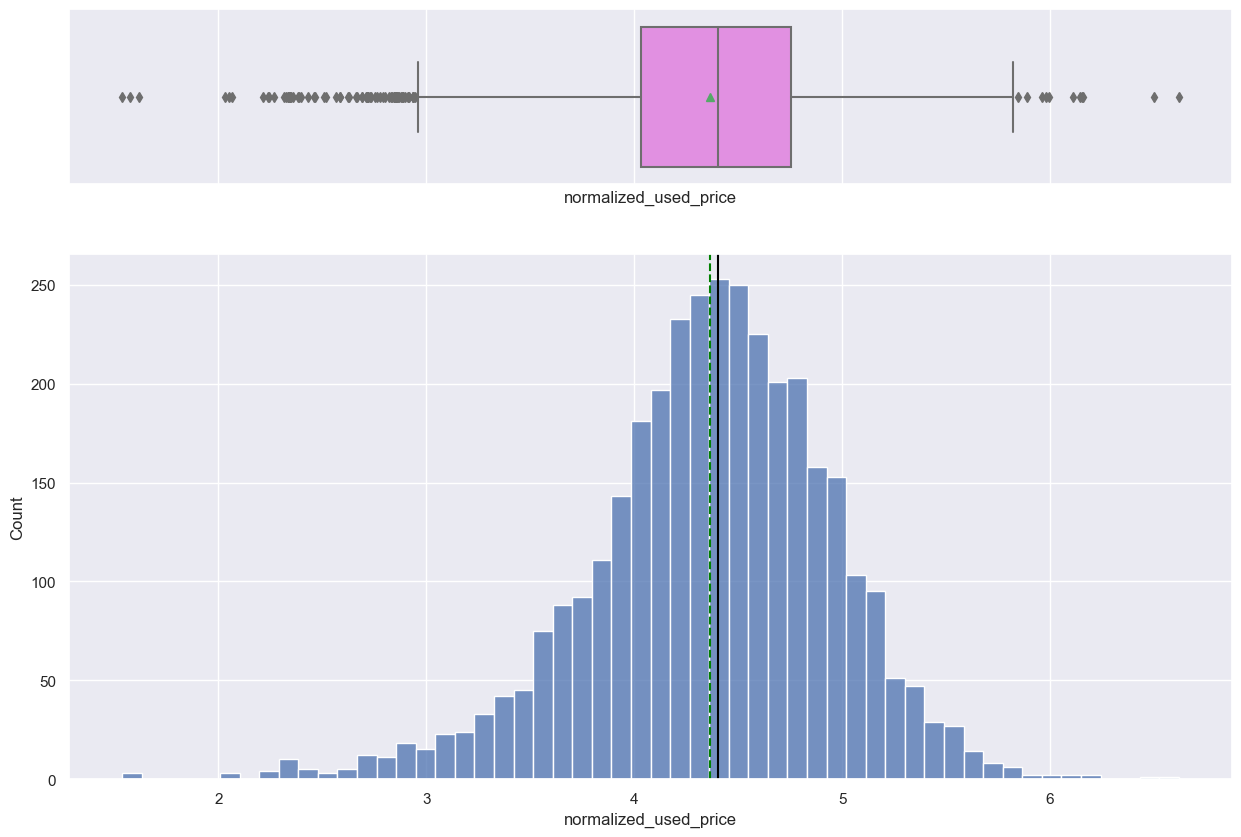

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(data, "normalized_used_price")

#### Observation

* Normalized used price follows normal distribution approximately. Mean and median are very close, shows very slight skew.
* There are outliers in used price data.

#### Normalized New price

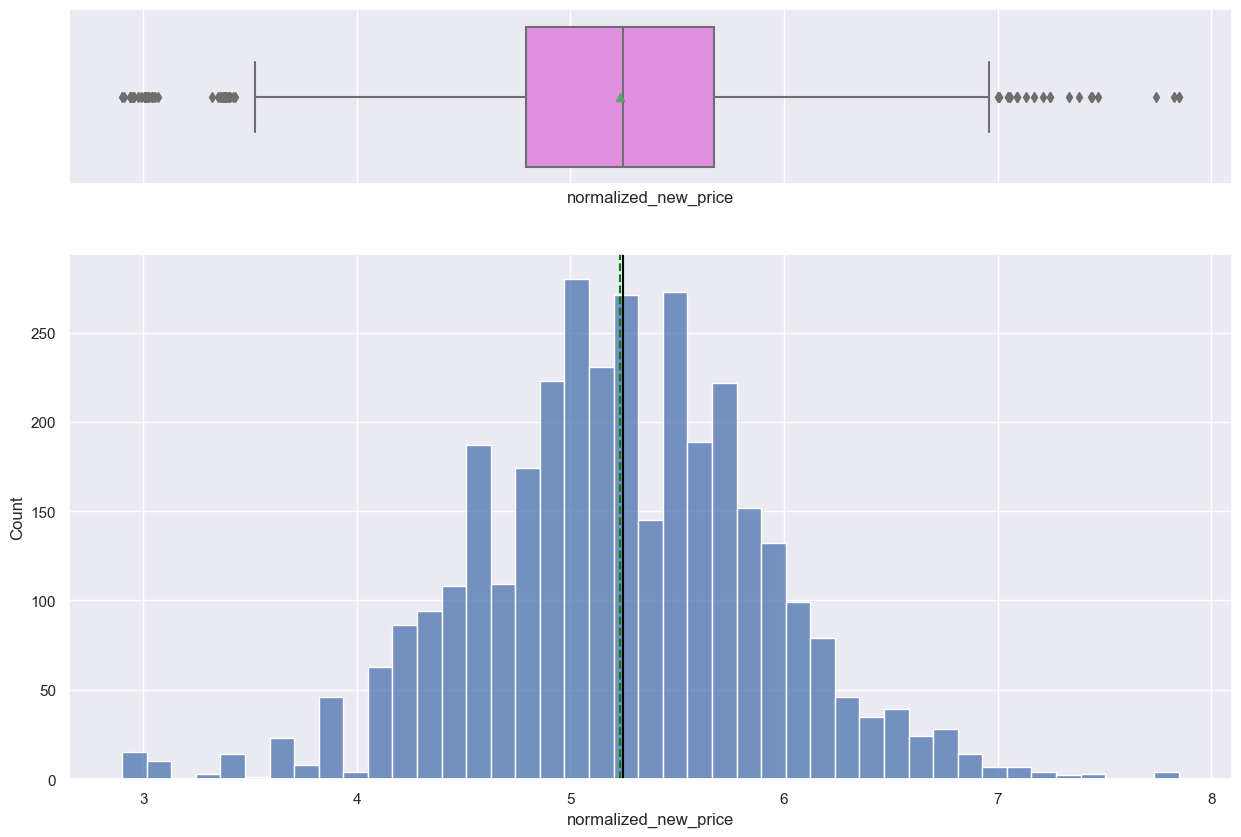

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(data, "normalized_new_price")

* Normalized new price is normally distributed with mean and median very close to each other.

#### Screen Size

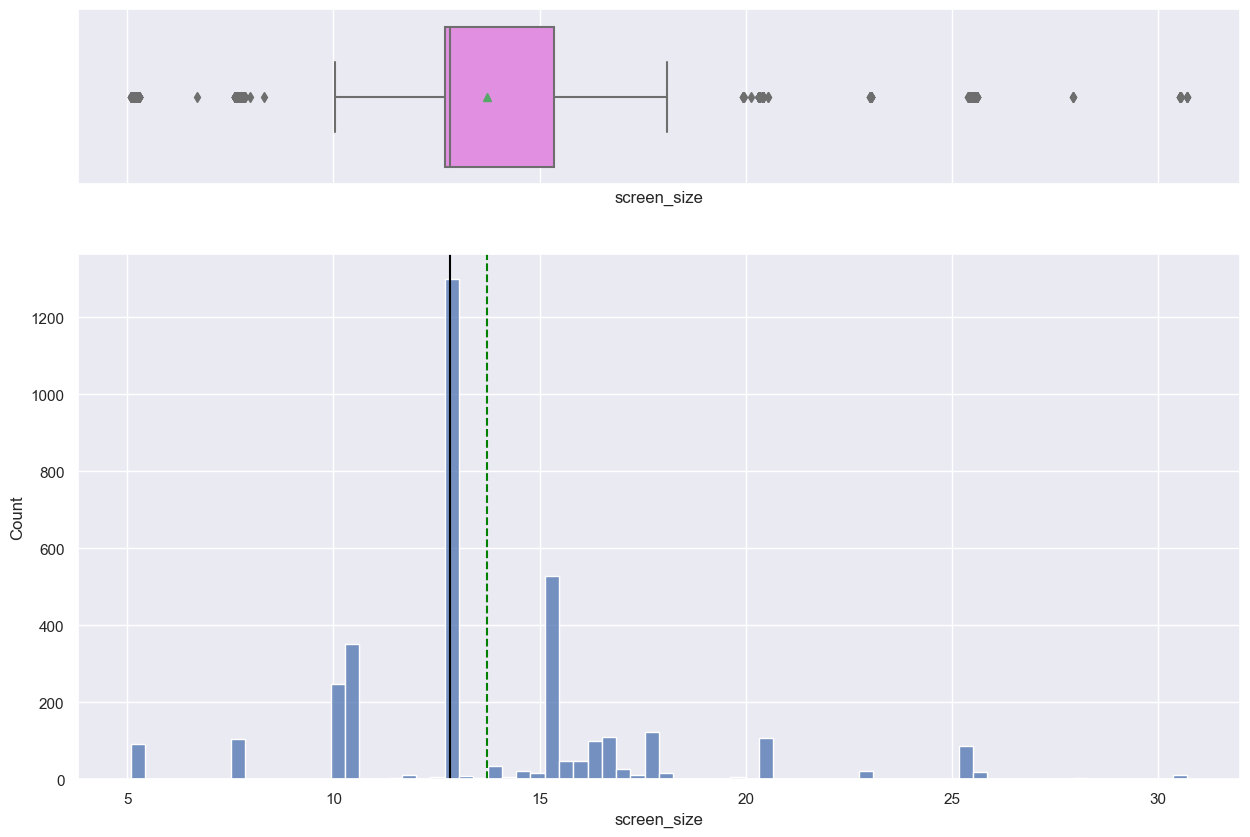

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(data, "screen_size")

* Average screen size is about 12 cm.

#### Main Camera mp

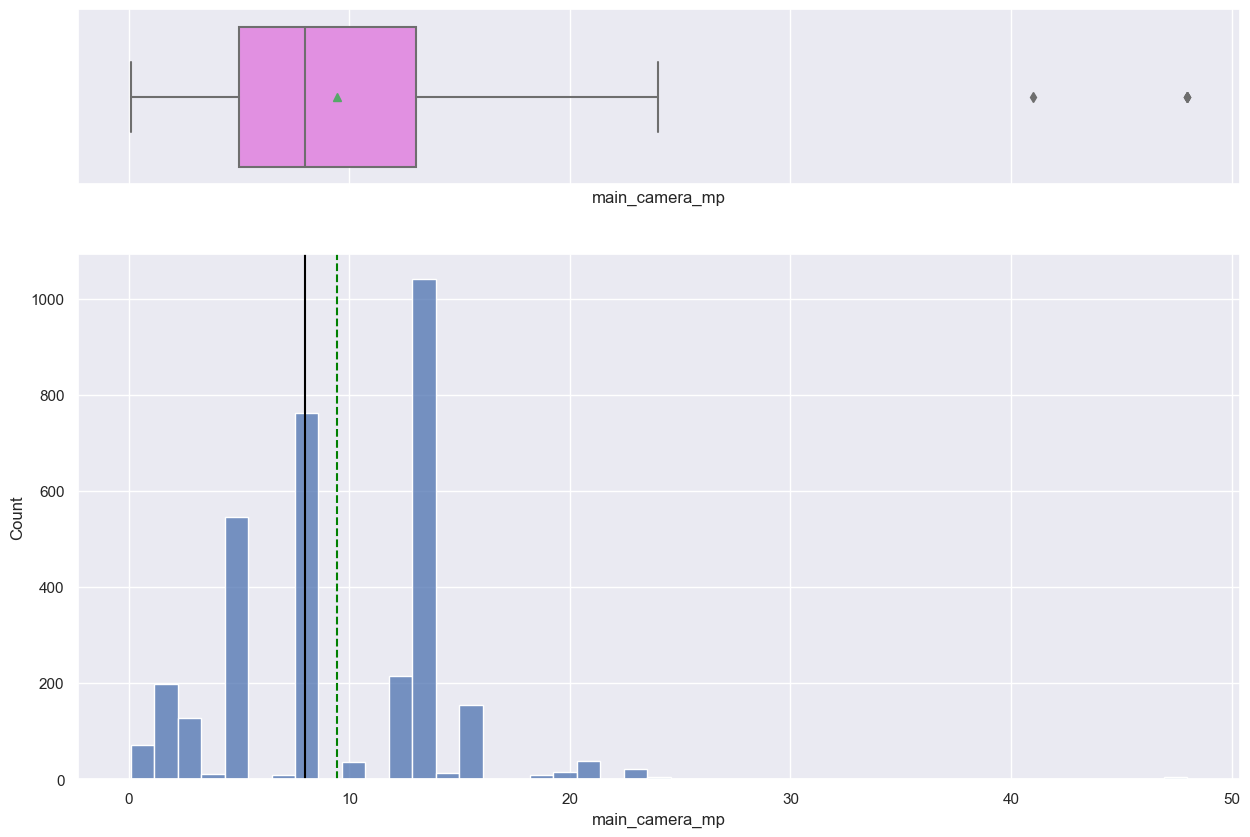

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(data, "main_camera_mp")

* Main_camera_mp distribution is left skewed. Mean value is about 9.4 mp.

#### Selfie camera mp

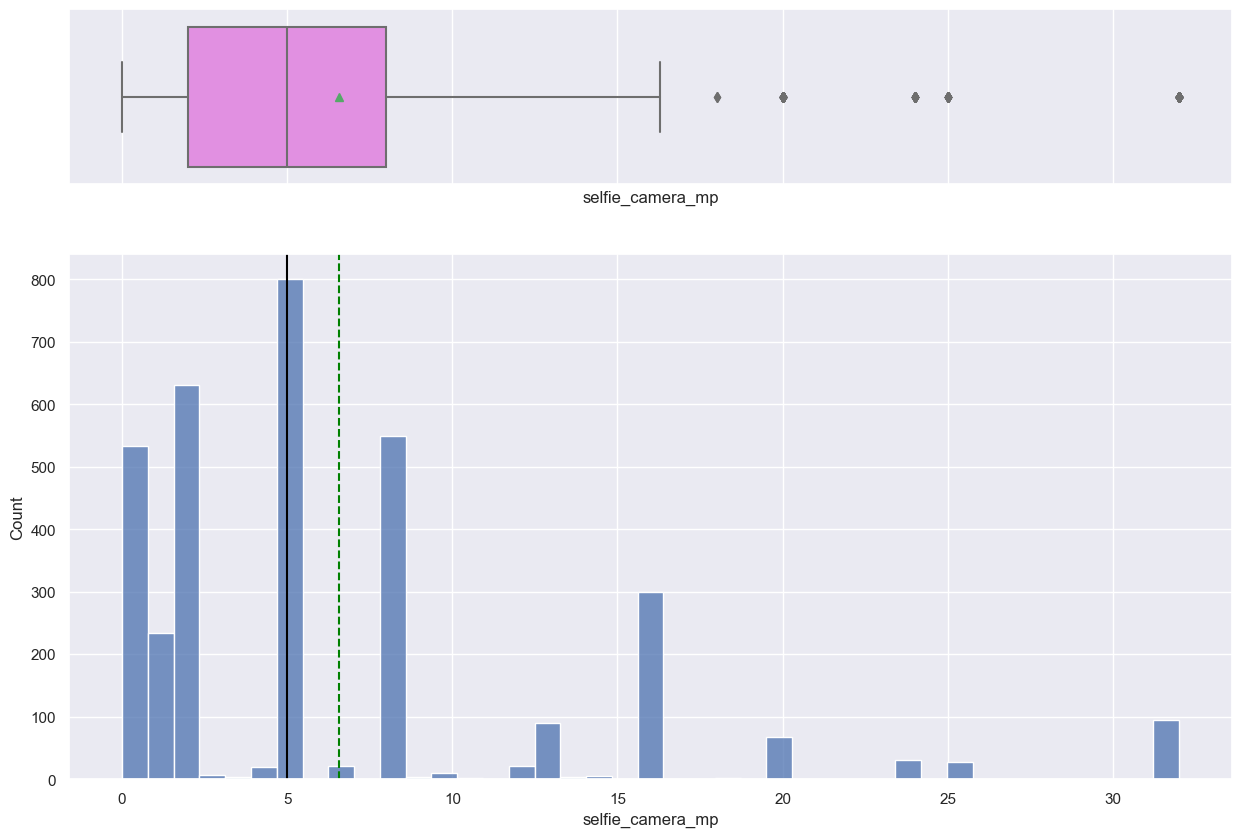

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(data, "selfie_camera_mp")

* Selfie_camera_mp distribution is right skewed. Mean is about 6.5mp.

#### Int memory

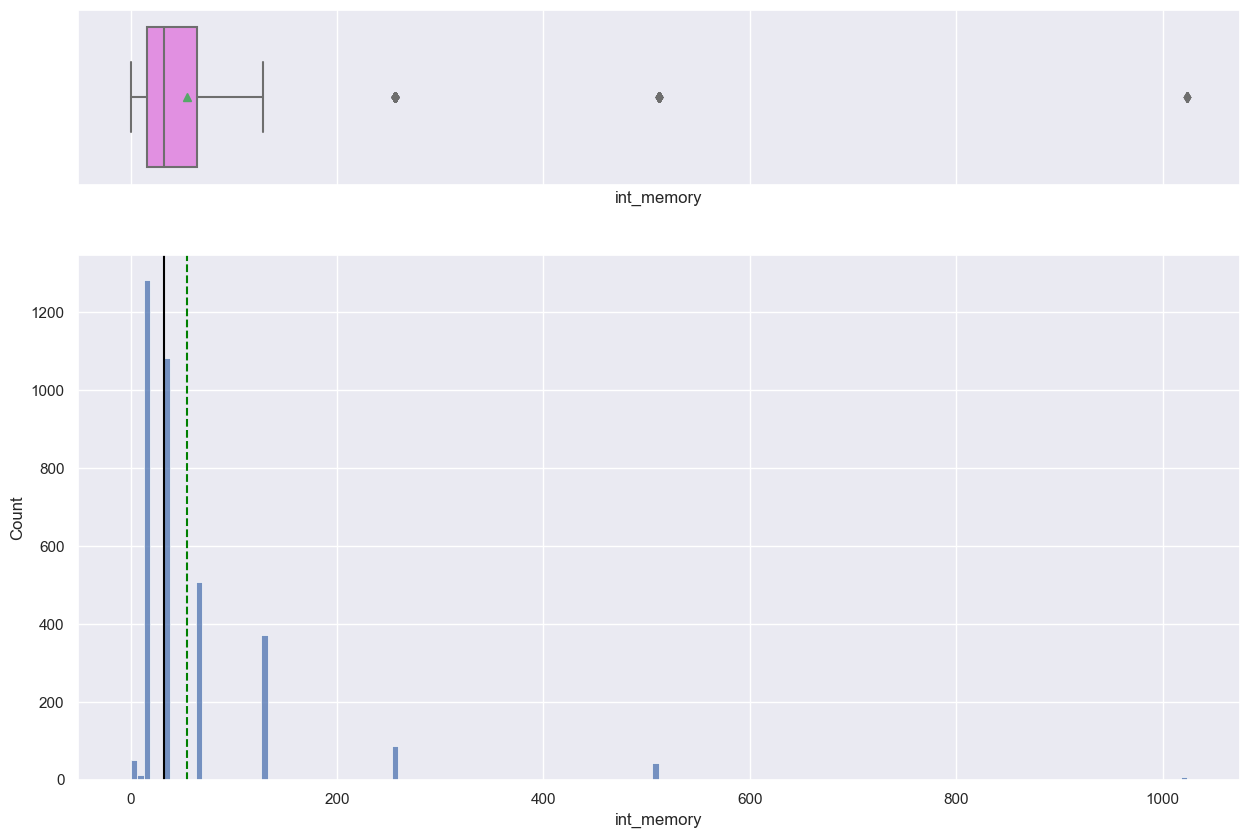

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "int_memory")

* Internal memory distribution is right skewed. Most devices had less than 100GB configuration.

#### RAM

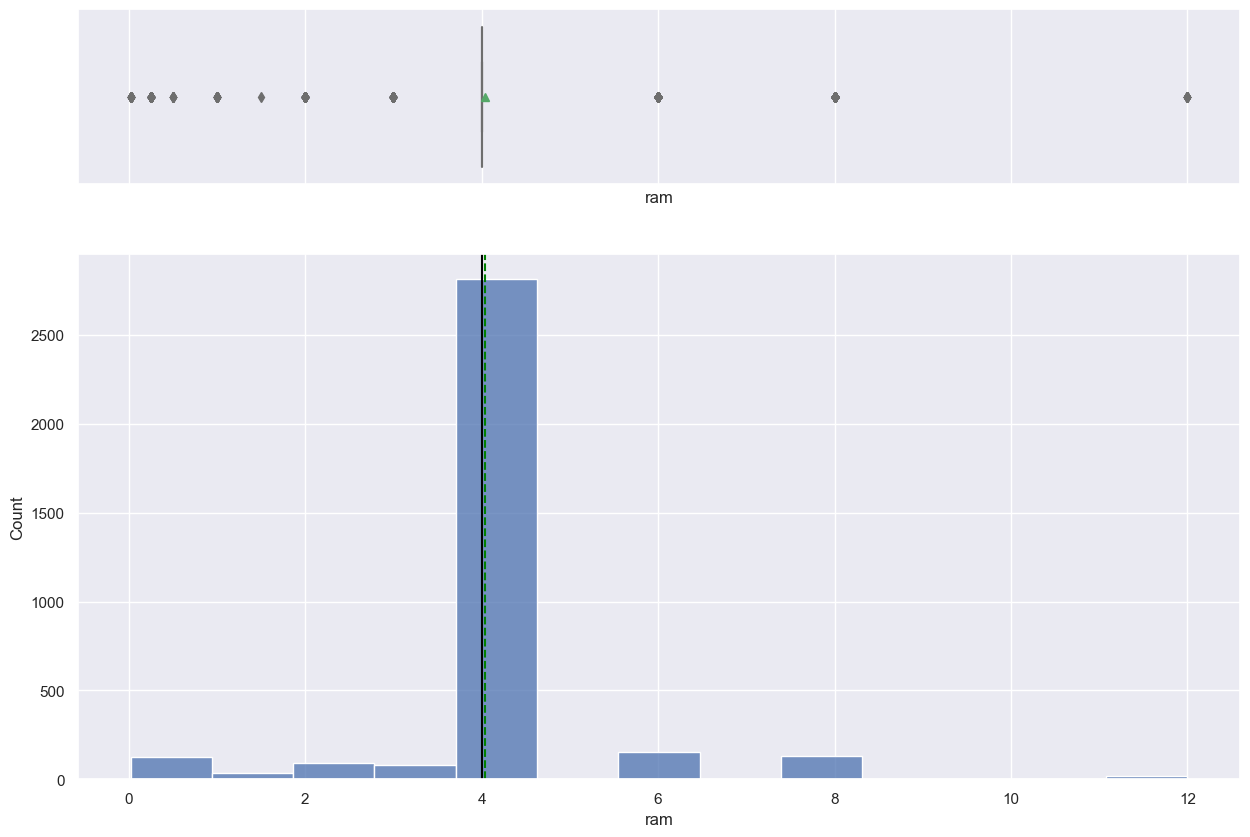

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "ram")

* 4GB RAM is the most common configuration.Lot of outliers in data.

#### Weight

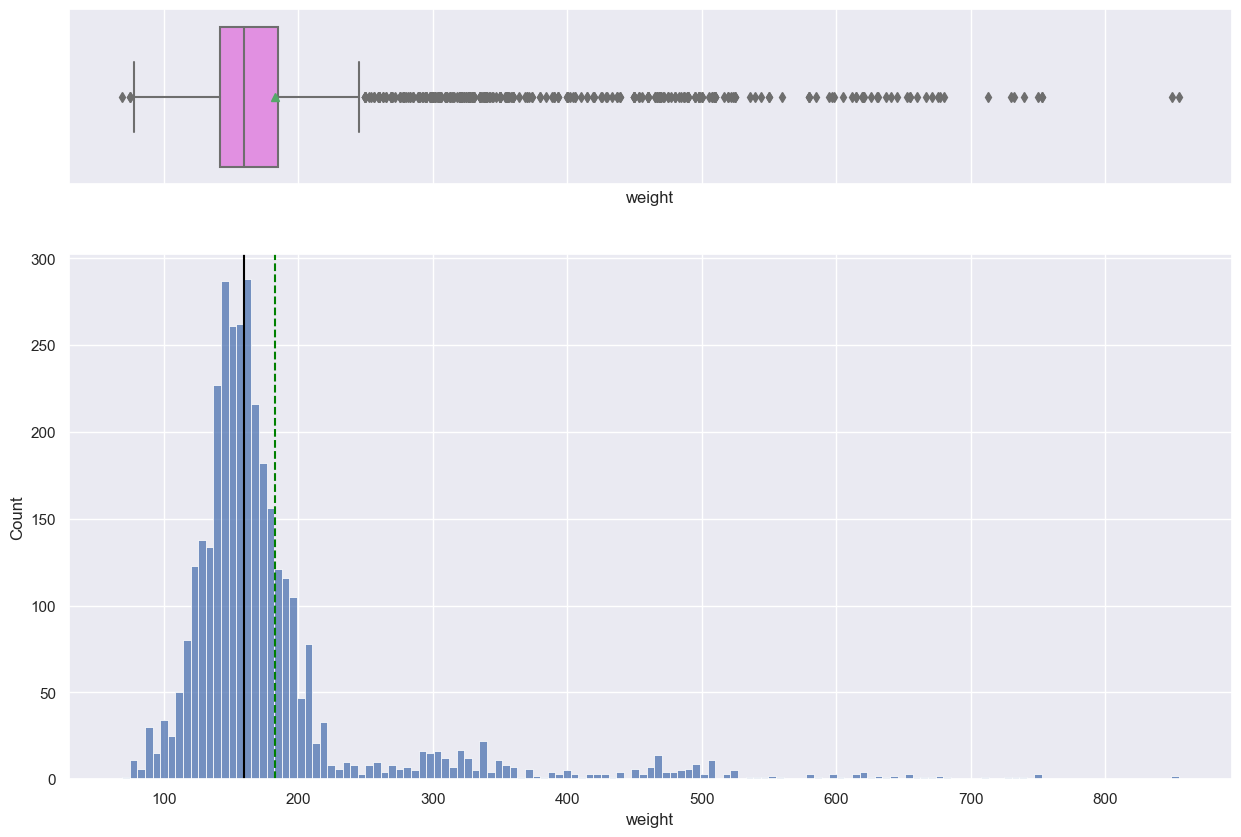

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "weight")

* Weight distribution is right skewed, boxplot reveals lot of outliers. 
* Some devices weighed over 500 gms but average is 182 gm.

#### Battery

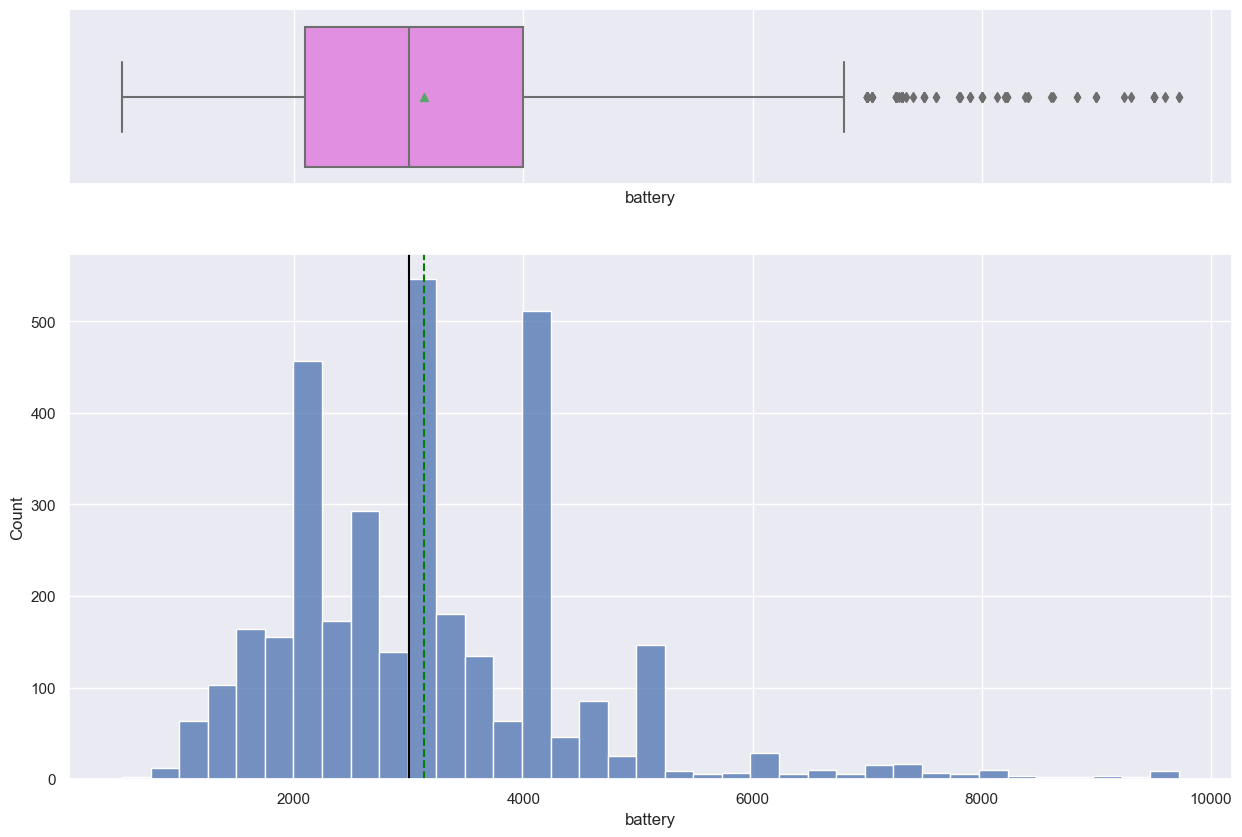

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "battery")

* Battery distribution is right skewed. Most devices have less than 5000 mAh capacity.

#### Days used

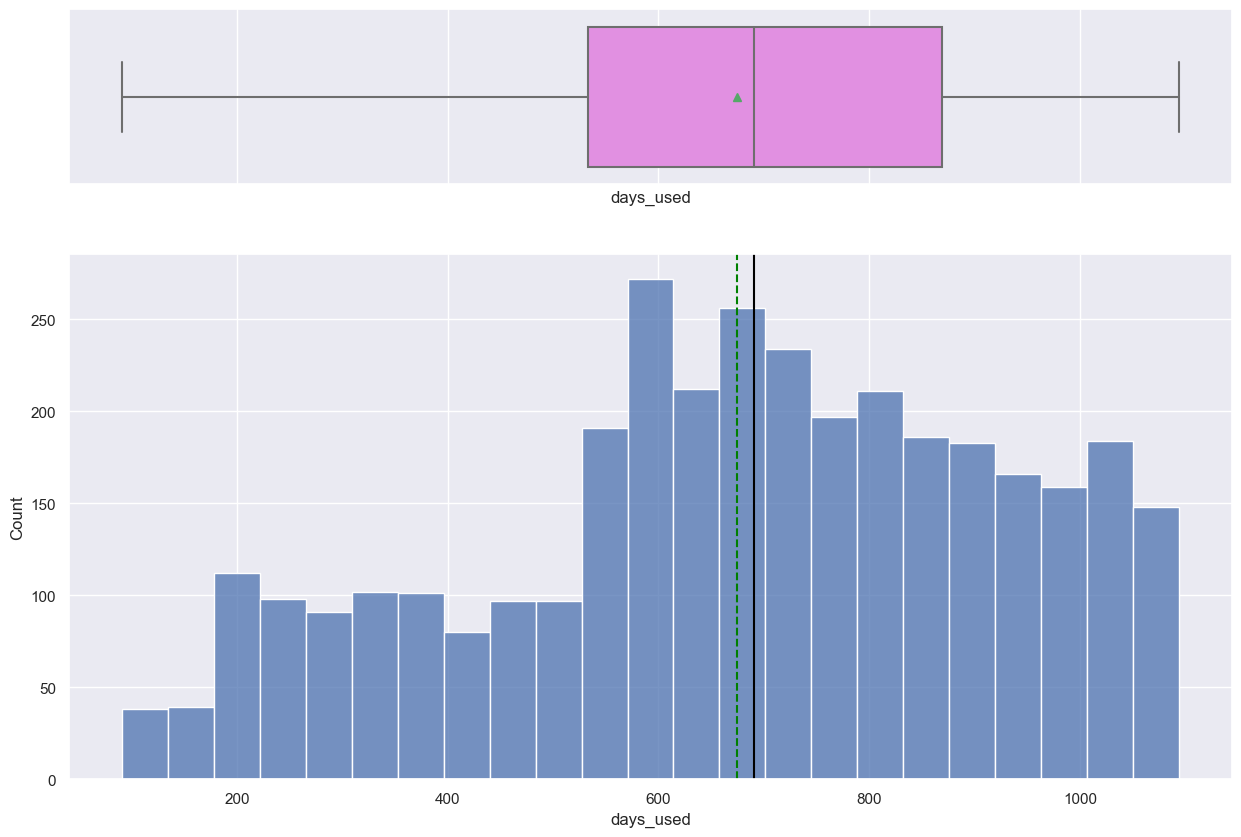

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "days_used")

* Days used distribution is left skewed. On average, devices are used for about 675 days.

#### Release Year

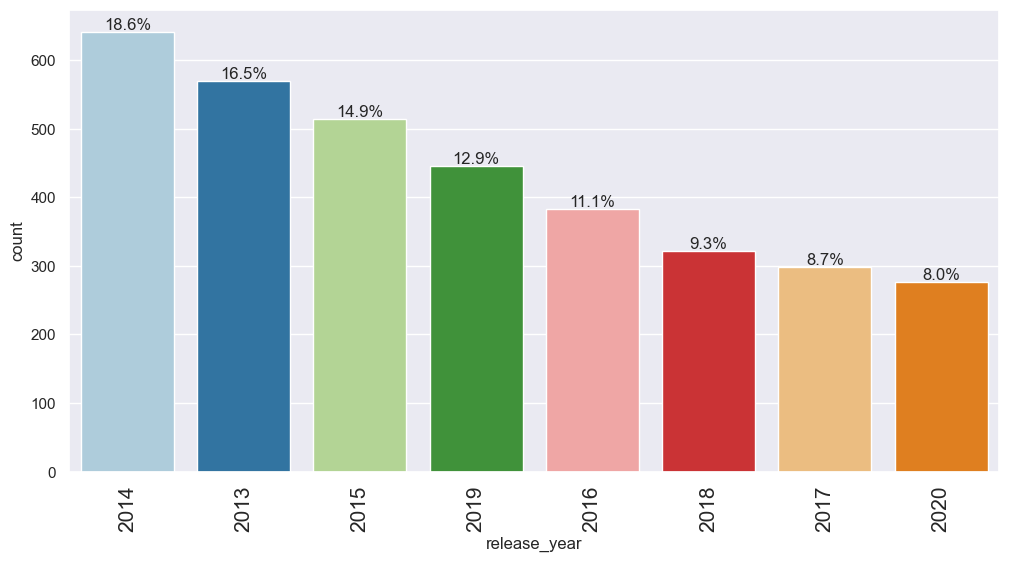

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "release_year", perc=True, n=10)

* Most devices were released in 2014 followed by 2013 and 2015. Recell has very few phones released in 2020, which is understandable as phones are used on average for 600+ days and dataset pertains to data collected in 2021.

#### Brand Name

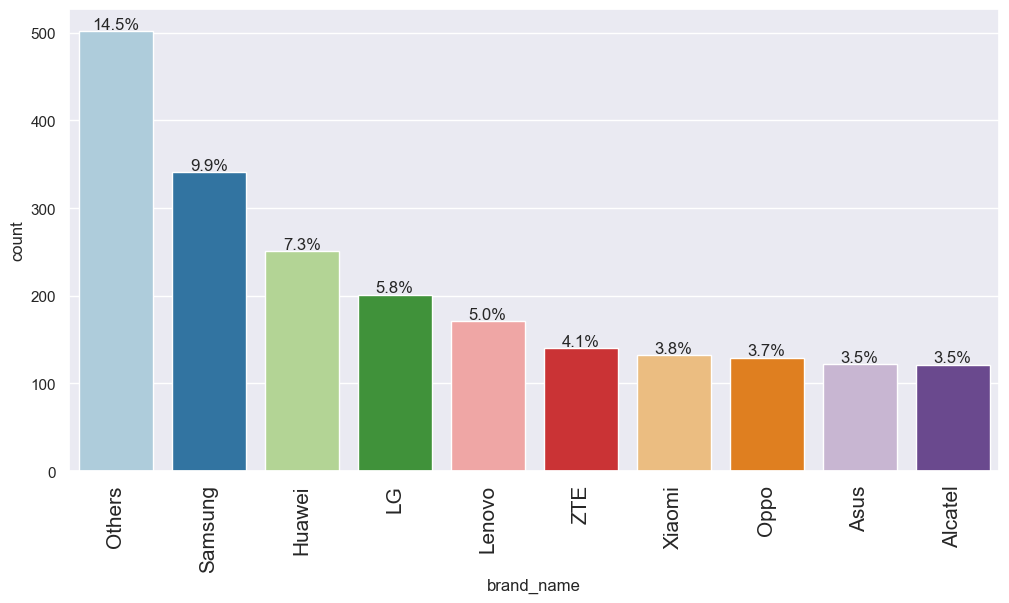

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "brand_name", perc=True, n=10)

* There is a wide range of brands available in refurbished market. "Others" brand probably contains devices made by less well known manufacturers.
* Out of 34 unique brands in dataset, "Others", Samsung, Huwawei, LG, Lenovo are the most popular

#### OS

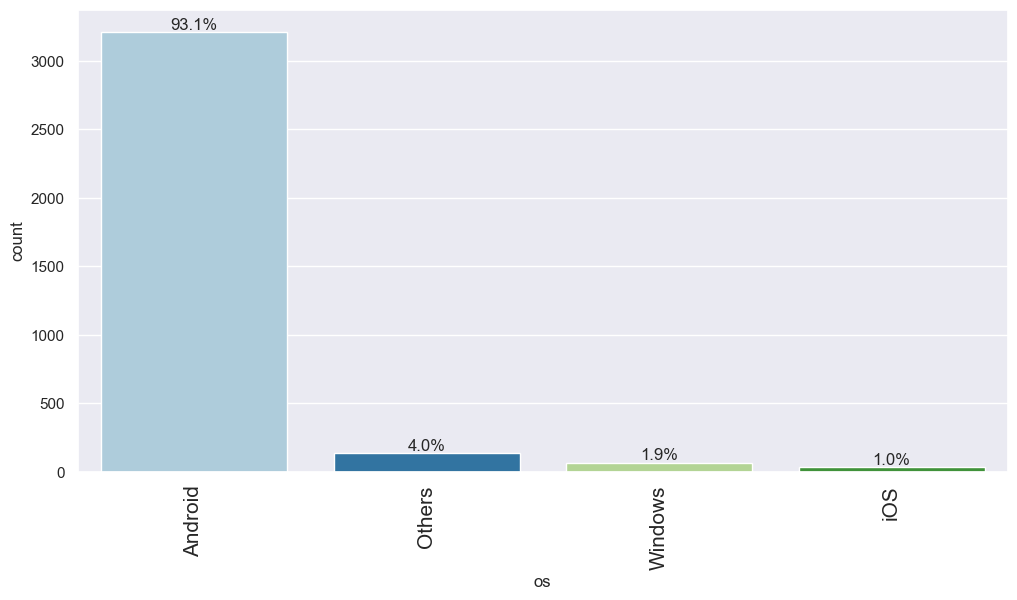

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "os", perc=True, n=10)

* Android is the most popular os.

#### 4G

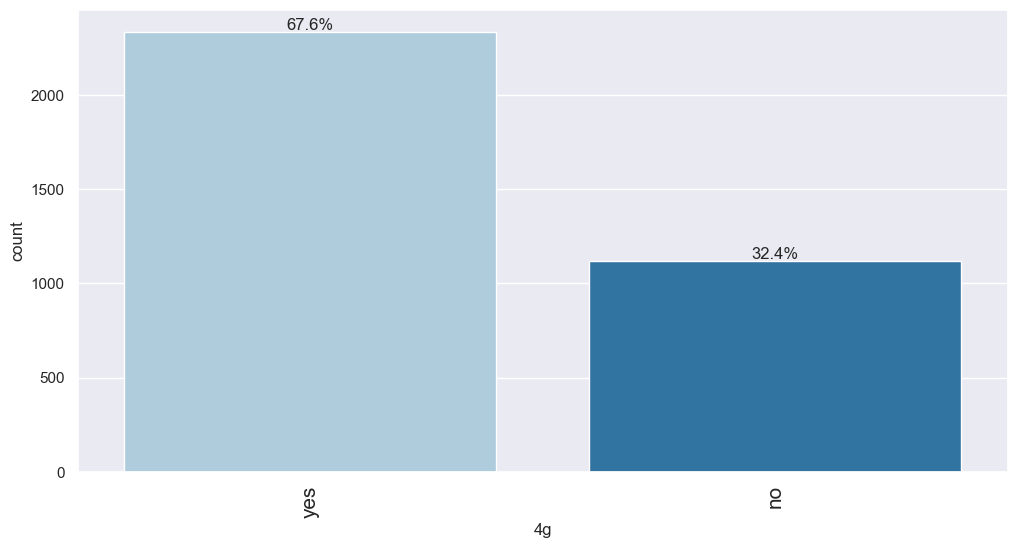

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "4g", perc=True, n=10)

* There are more 4g enabled devices than 5g.

#### 5G

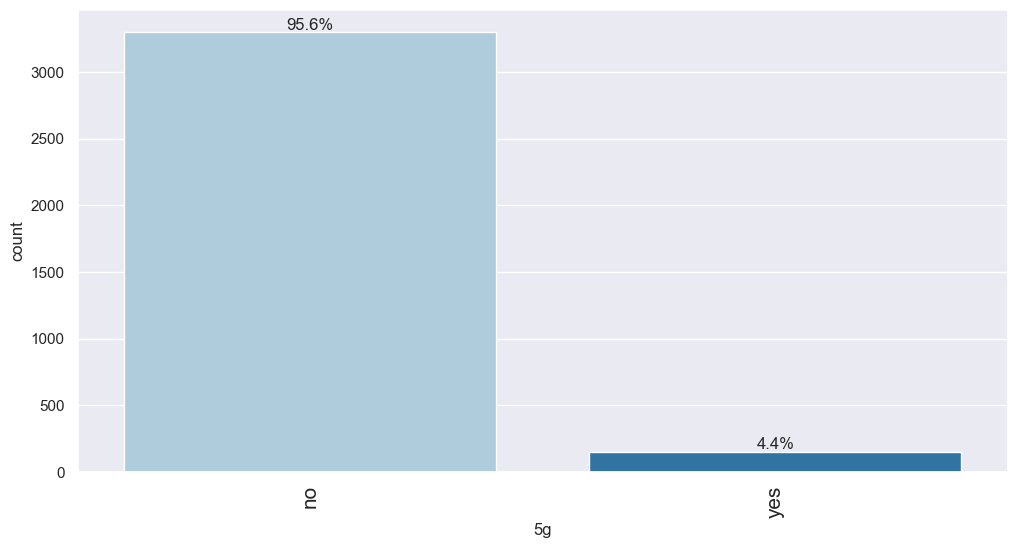

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "5g", perc=True, n=10)

* Only 4% of devices are 5G enabled.

### Bivariate Analysis

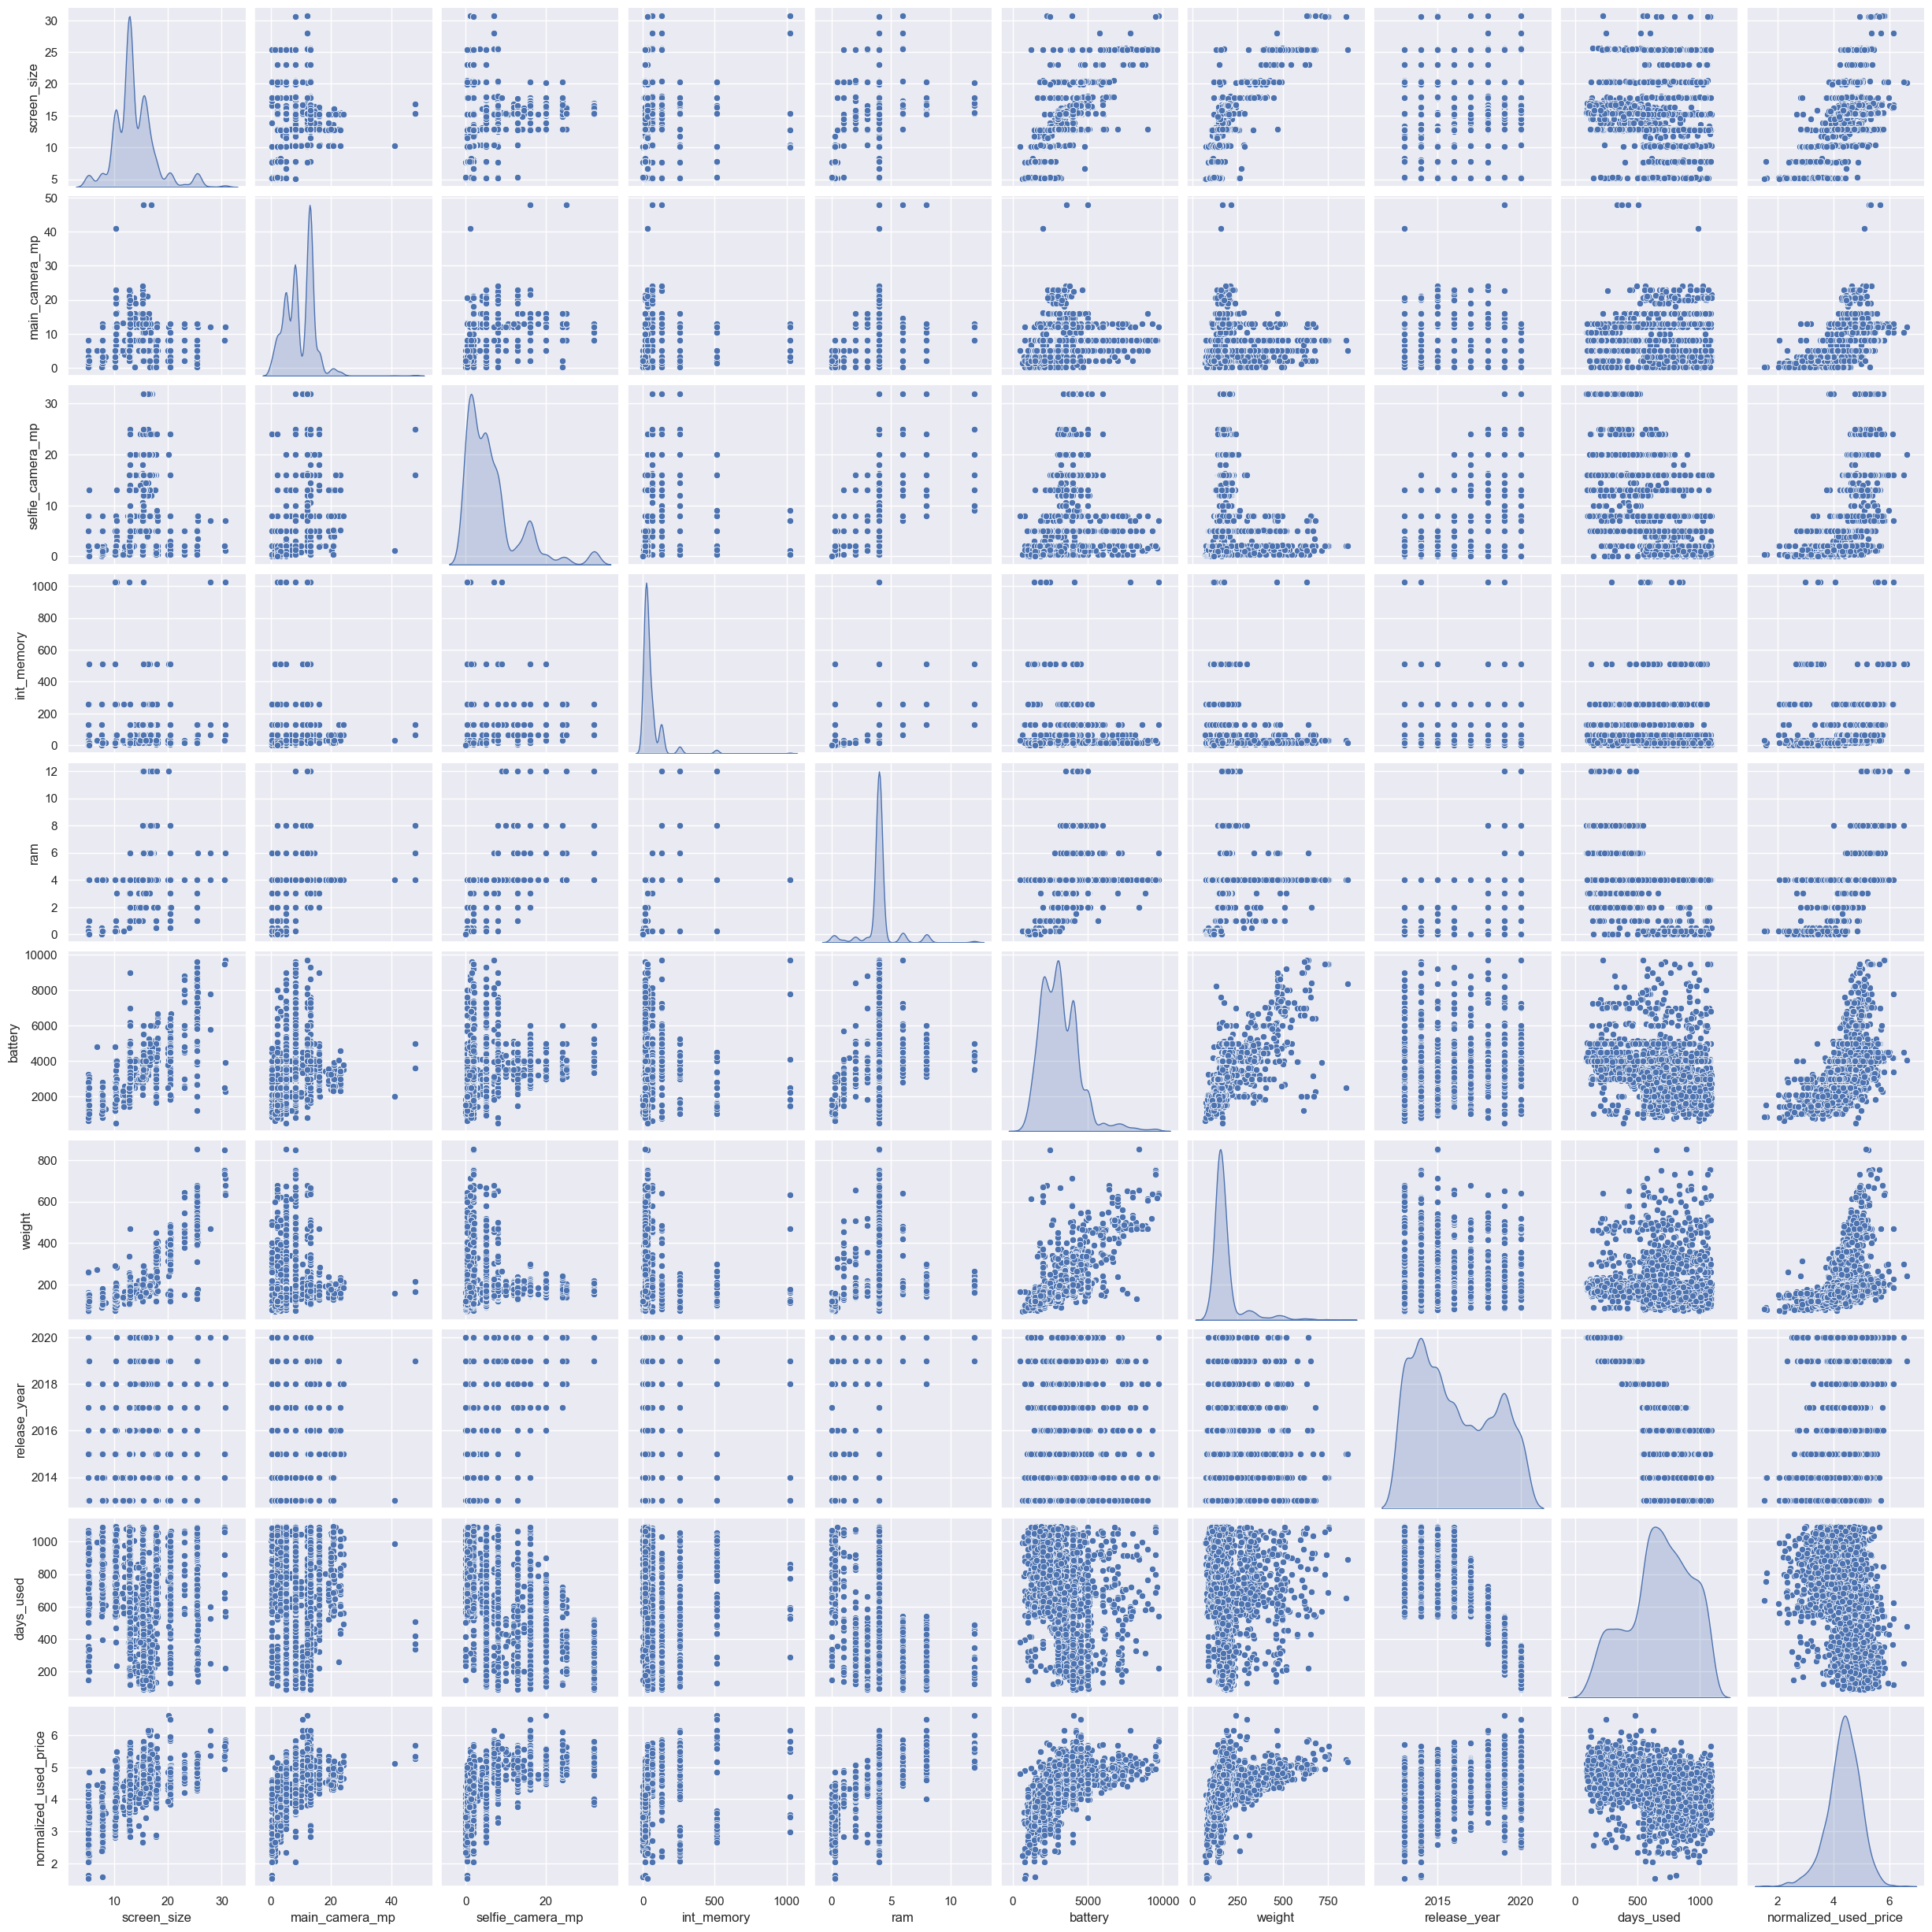

<IPython.core.display.Javascript object>

In [27]:
data_attr = data.iloc[:, 1:14]
sns.pairplot(
    data_attr, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

#### Observation

* Plots suggest screen_size, selfie_camera_mp, battery, main_camera_mp, RAM, weight, internal memory to have some sort of positive relationship with normalized used price.

* Release_year, days_used do not suggest clear correlation.Further analysis will reveal better insight.

## Questions:

#### 1. What does distribution of normalized used device prices look like?

Normalized_used_price histogram shown in univariate analysis above.
Distribution is approximately normally distributed, mean used price is slightly less than median, suggesting left skewness, but not too concerning.

#### 2. What percentage of used device market is dominated by Android devices?

Barplot shown in univariate analysis above. 
93% of used device market is dominated by Android devices.

#### 3. The amount of RAM is important for smooth functioning of a device. How does amount of RAM vary with brand?

In [28]:
df["brand_name"].nunique()

34

<IPython.core.display.Javascript object>

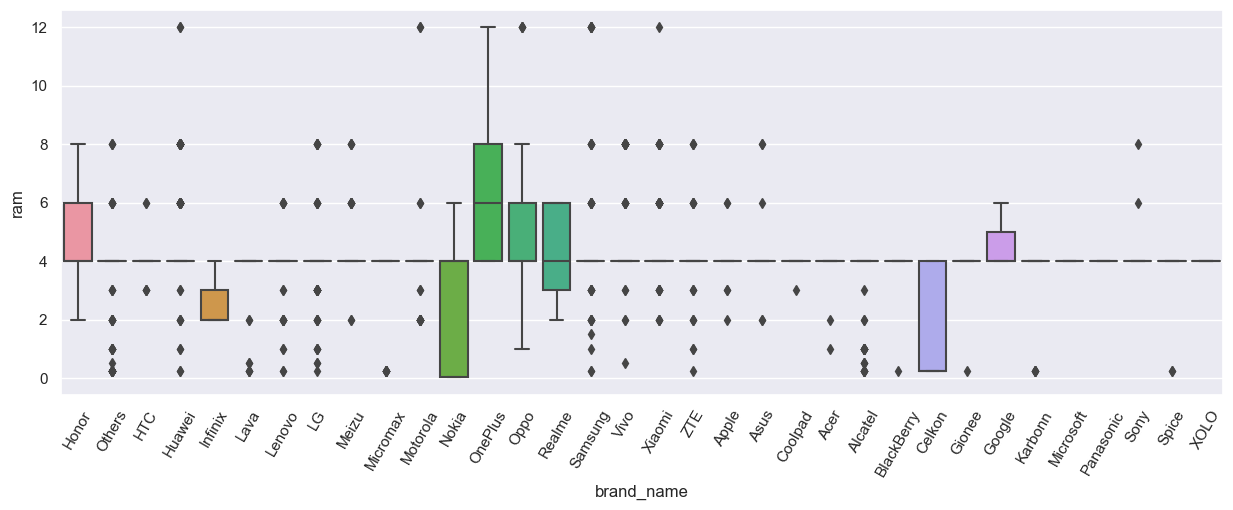

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=60)
plt.show()

* Average RAM value acorss devices is 4gb. OnePlus,Oppo,Honor,Realme, Google seem to have close to or higher than mean RAM values.
* Infinix,Nokia,Celkon brands seem to offer devices with lower than 4GB.

#### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [30]:
df_large_batt = df[df.battery > 4500]
df_large_batt.shape

(341, 15)

<IPython.core.display.Javascript object>

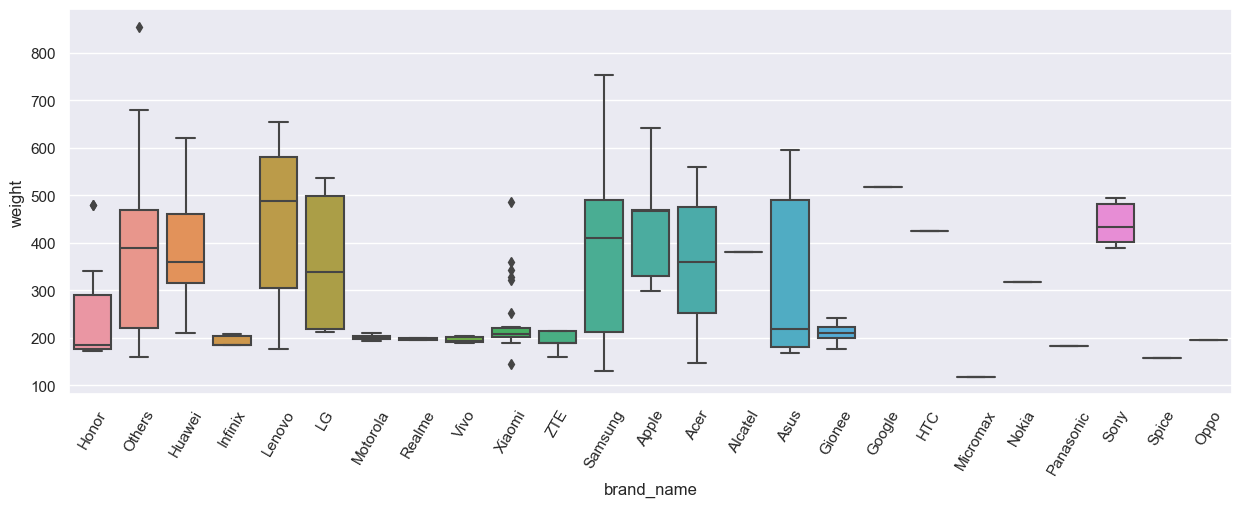

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=df_large_batt, x="brand_name", y="weight"
)  # boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=60)
plt.show()

In [32]:
df_large_batt = df[df.battery > 4500]
brand_by_weight = df_large_batt.groupby(["brand_name"])["weight"].mean()
brand_by_weight.sort_values(ascending=False).head(10)

brand_name
Google     517.000000
Lenovo     442.721429
Apple      439.558824
Sony       439.500000
HTC        425.000000
Samsung    398.352000
Huawei     394.486486
Others     390.546341
Alcatel    380.000000
LG         366.058333
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

* Google, Lenovo, Apple, Sony and HTC are the top 5 brands offering large batteries.
* Some unknown brand names (others) offer heaviest devices, suggesting very large screens.

#### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across brands with screen size larger than 6 inches?

In [33]:
df_big_screen = df[
    df.screen_size > 6 * 2.54
]  ##  1 inch = 2.54 cm, screen size column is in cm
df_big_screen.shape

(1099, 15)

<IPython.core.display.Javascript object>

In [34]:
df_big_screen["brand_name"].value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
Gionee         3
XOLO           3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

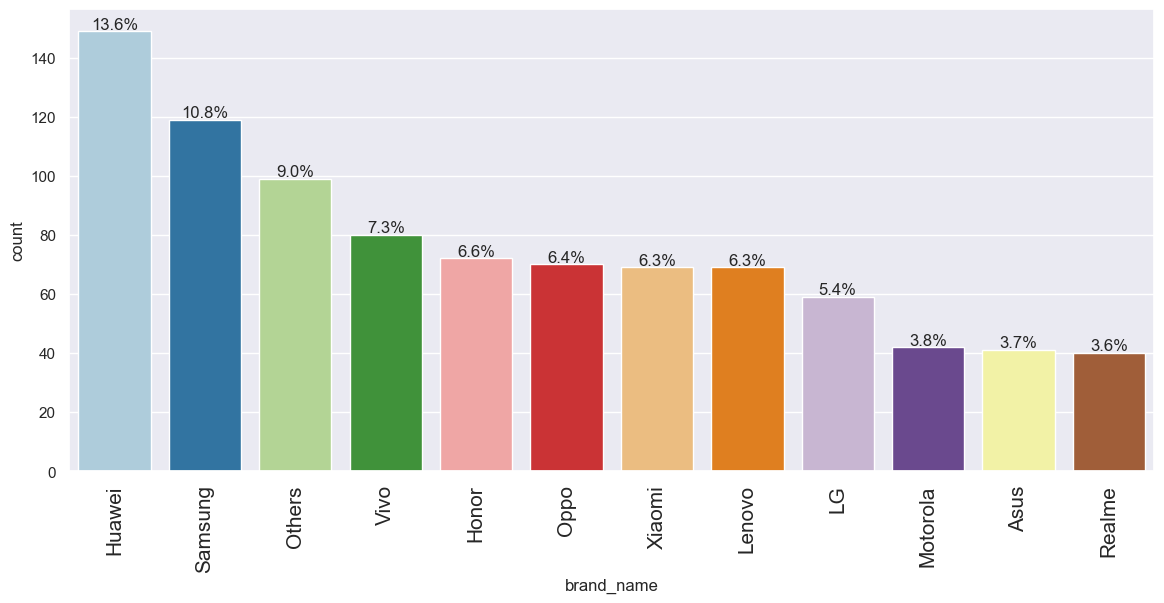

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(
    df_big_screen, "brand_name", perc=True, n=12
)  ## barplot for top 12 brands with screen size > 6 inches

* 1099 devices in dataset with greater than 6 inches screen size
* Huawei, Samsung, Others, Vivo, Honor, Oppo are the top brands with screensize greater than 6 inches

#### 6. A lot of devices nowadays offer great selfie cameras. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [36]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

<IPython.core.display.Javascript object>

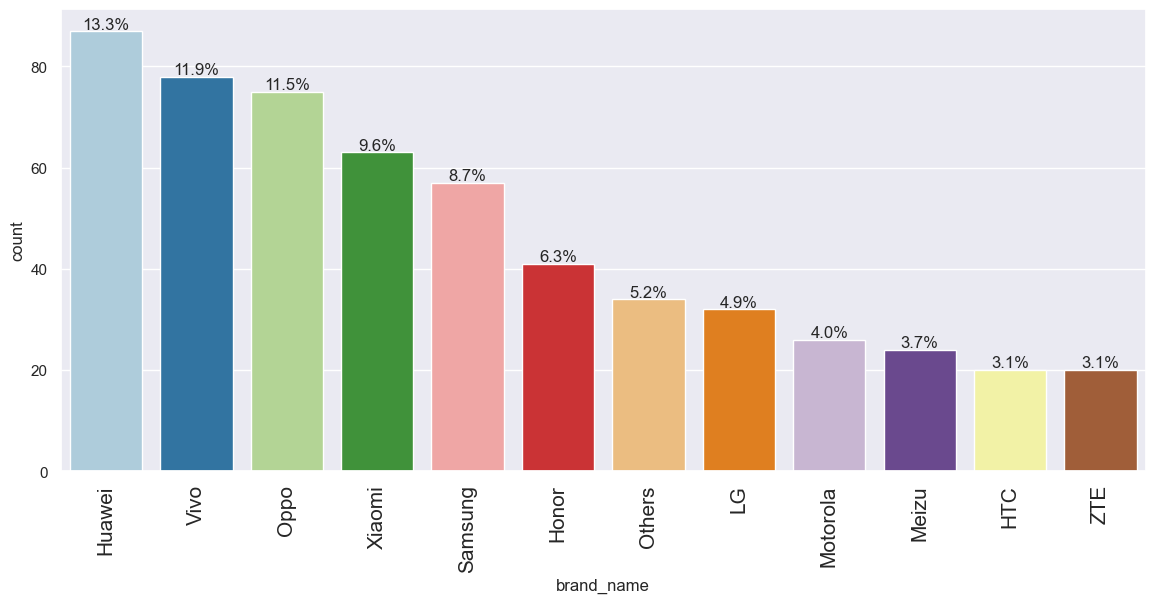

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(
    df_selfie_camera, "brand_name", perc=True, n=12
)  ## barplot for top 12 brands with selfie camera > 8 mp

* 655 devices with selfie camera > 8mp.
* Huawei, Vivo, Oppo , Xiaomi, Samsung are the top 5 brands with devices greater than 8mp selfie camera.

#### 7. Which attributes are highly correlated with normalized price of a used device?

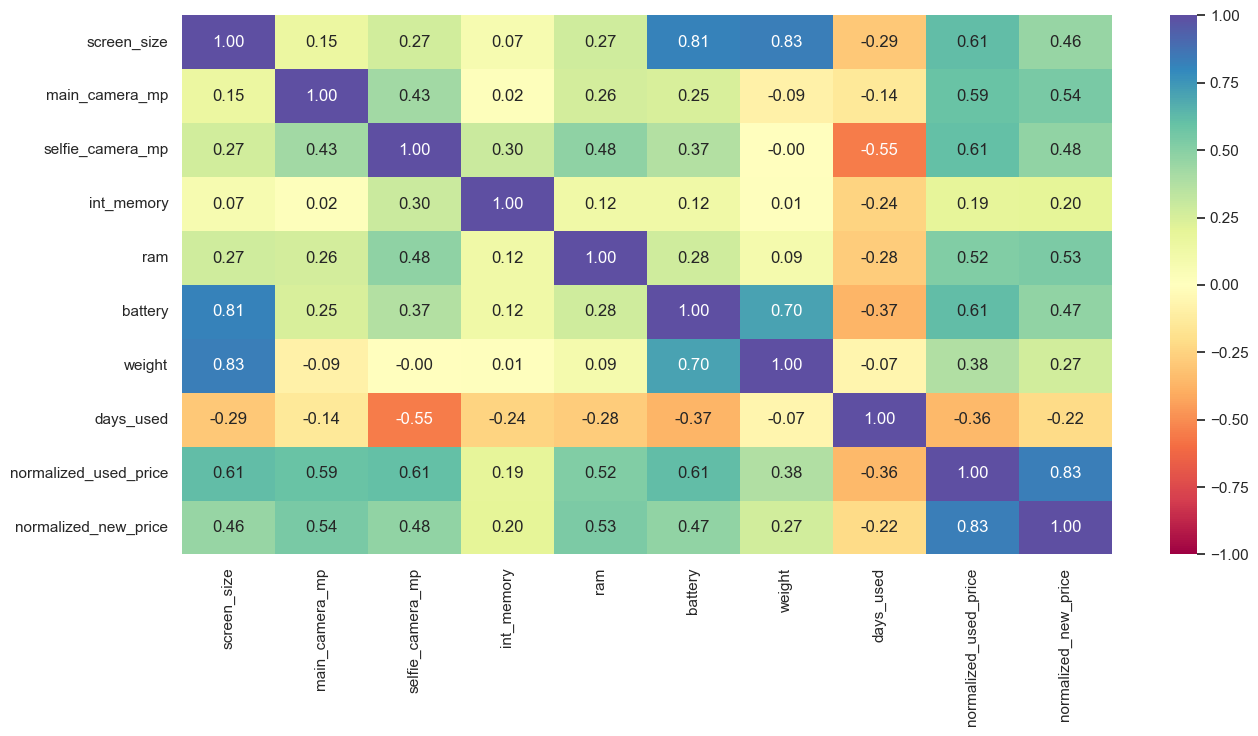

<IPython.core.display.Javascript object>

In [38]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Normalized used price is derived based on new price. They will always be very closely correlated to each other.
* Screen_size, selfie_camera_mp, battery, main_camera_mp, RAM are highly positively correlated with normalized price of used devices. 
* Device weight, internal memory are somewhat positively correlated while days_used is negatively correlated to used price.

## Additional questions:

#### Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP. 
#### What is the distribution of devices with rear camera resolution greater than 16MP across brands ?

In [39]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

<IPython.core.display.Javascript object>

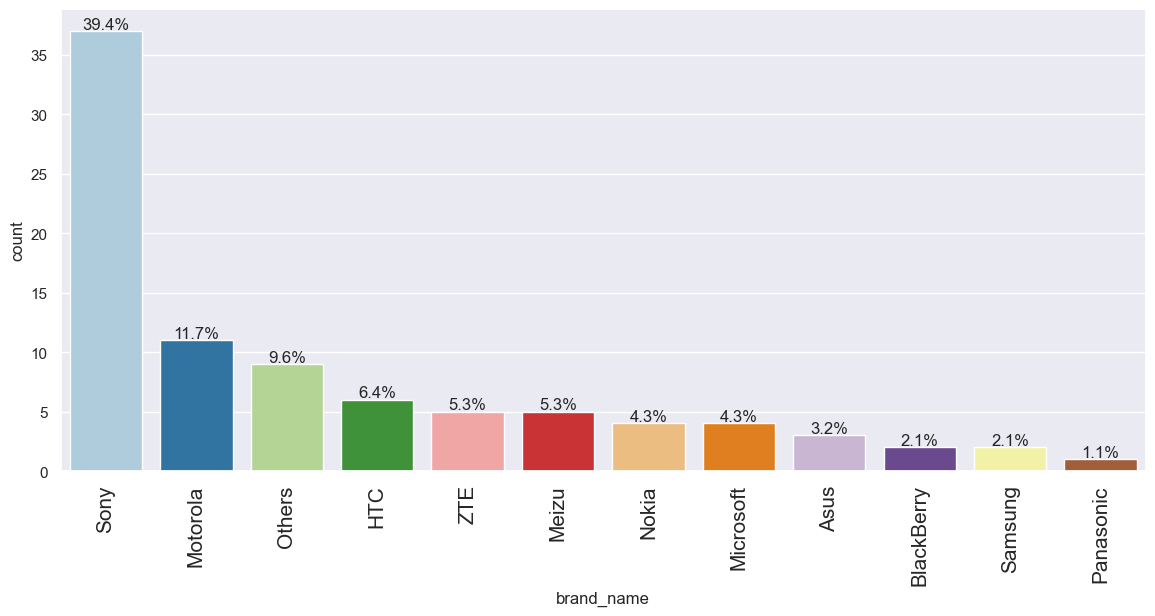

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(
    df_main_camera, "brand_name", perc=True, n=12
)  ## barplot for top 12 brands with main camera > 16 mp

* Sony, Motorola, Others, HTC are the top brands offering main camera resolution greater than 16mp

#### What is the variation of used device prices across years ?

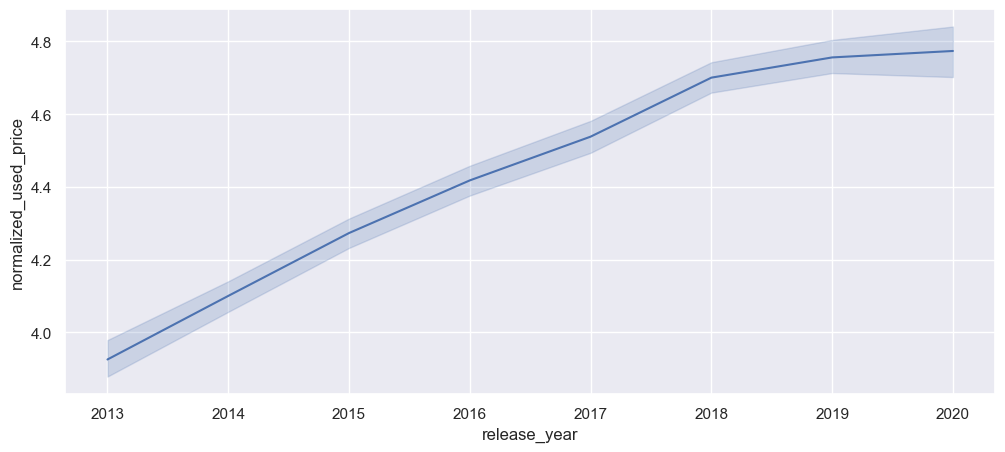

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=df, x="release_year", y="normalized_used_price"
)  ## lineplot for release year and used price
plt.show()

* Used device prices have steadily increased over the years

####  What is the variation of used device prices offering 4g and 5g networks ?

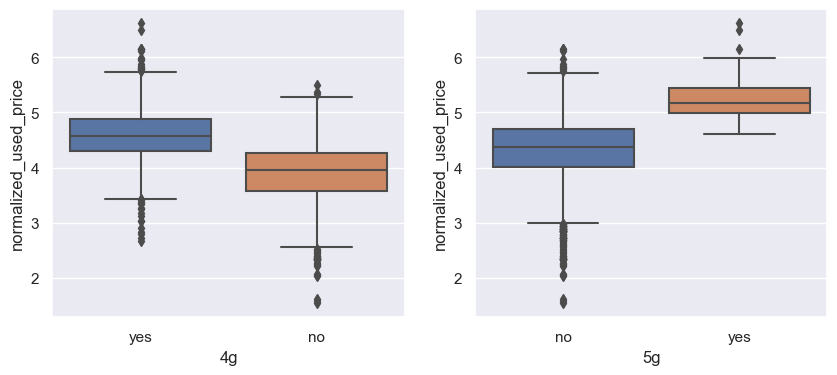

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

* Average normalized used price of devices offering 5g is higher than used price of devices offering 4g.

#### What is the variation of normalized used price across brands ?

<AxesSubplot:xlabel='normalized_used_price', ylabel='brand_name'>

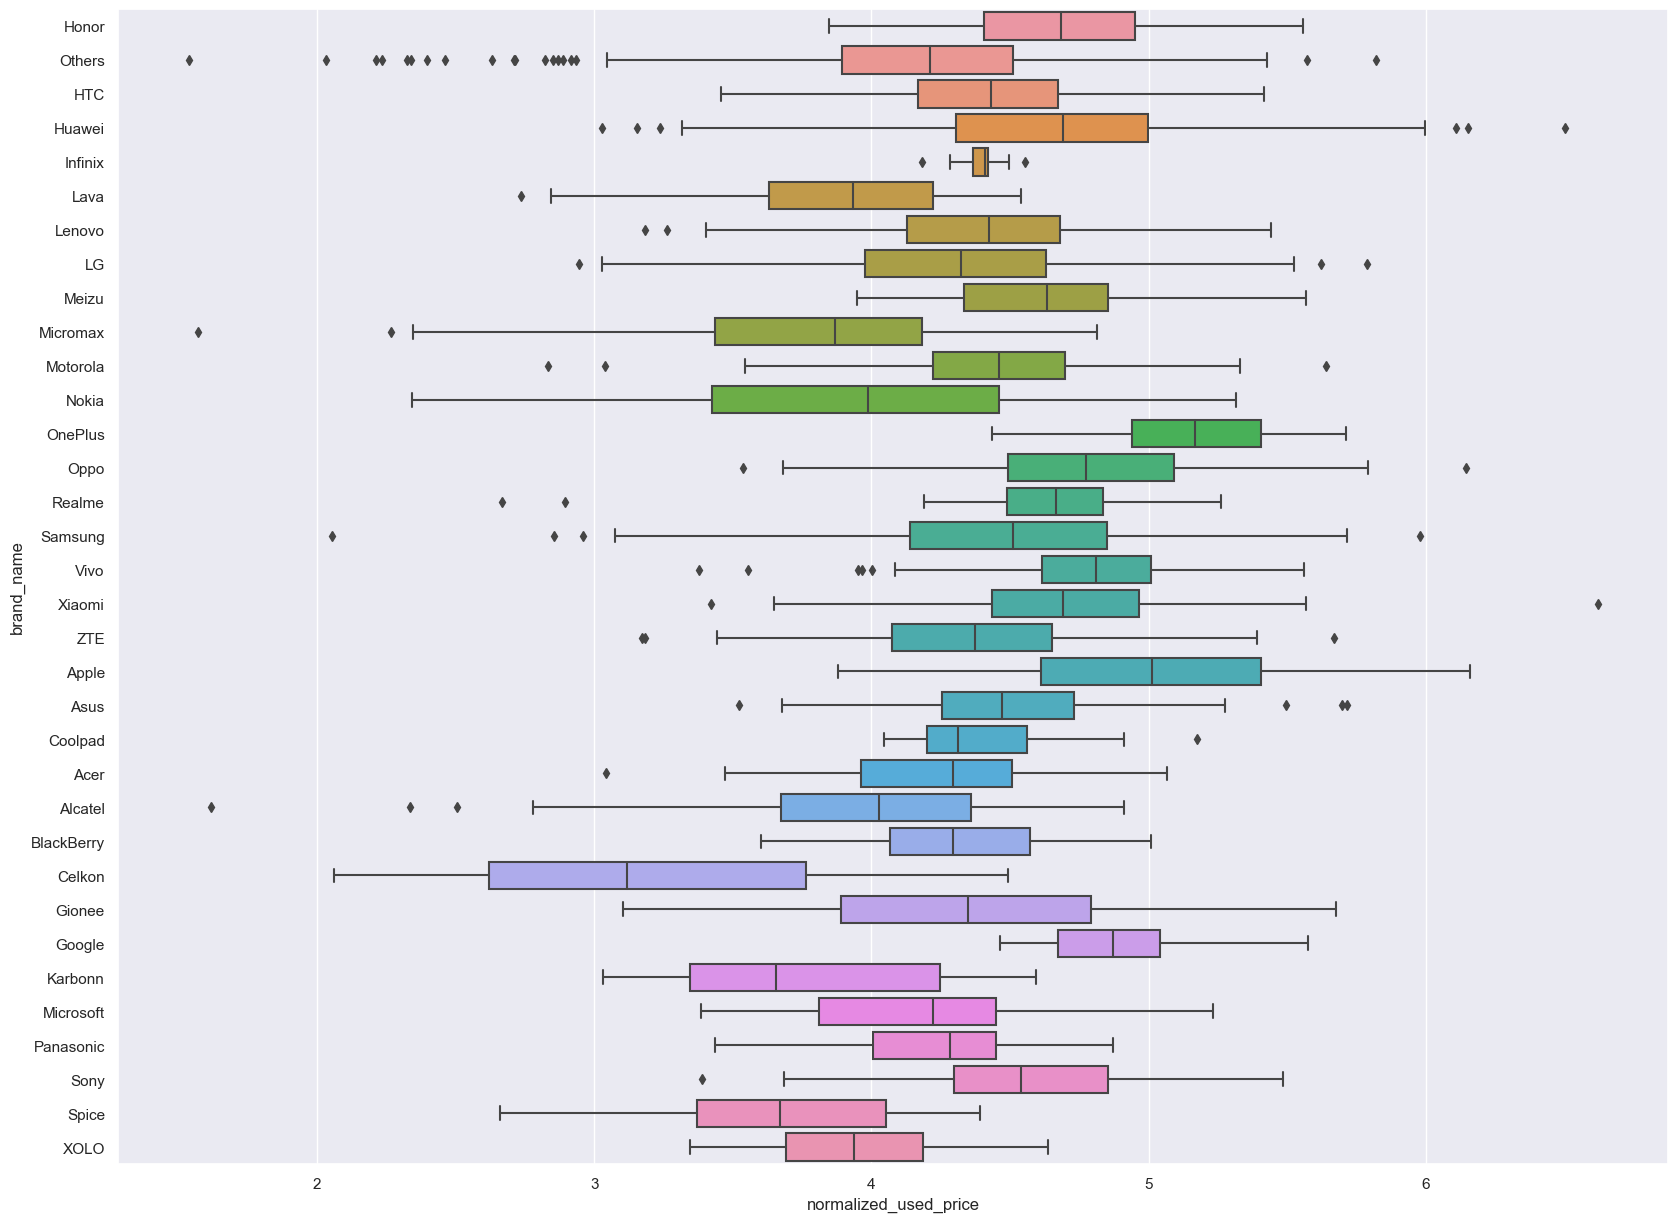

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(20, 15))
sns.boxplot(x="normalized_used_price", y="brand_name", data=df)

* Oneplus, Apple, Oppo, Realme are brands with higher average normalized used price
* Category of "others" with less well known brands indicate less than average normalized used price across their devices

#### Normalized used price versus OS

<AxesSubplot:xlabel='os', ylabel='normalized_used_price'>

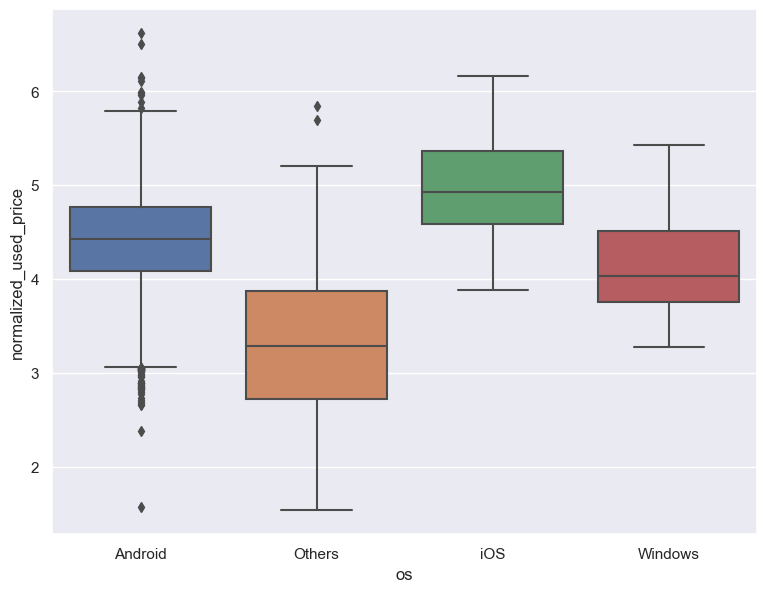

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.boxplot(x="os", y="normalized_used_price", data=df)

* Devices with IOS have the highest average normalized used price, followed by Android, Windows and Others

#### Normalized used price versus RAM

<AxesSubplot:xlabel='ram', ylabel='normalized_used_price'>

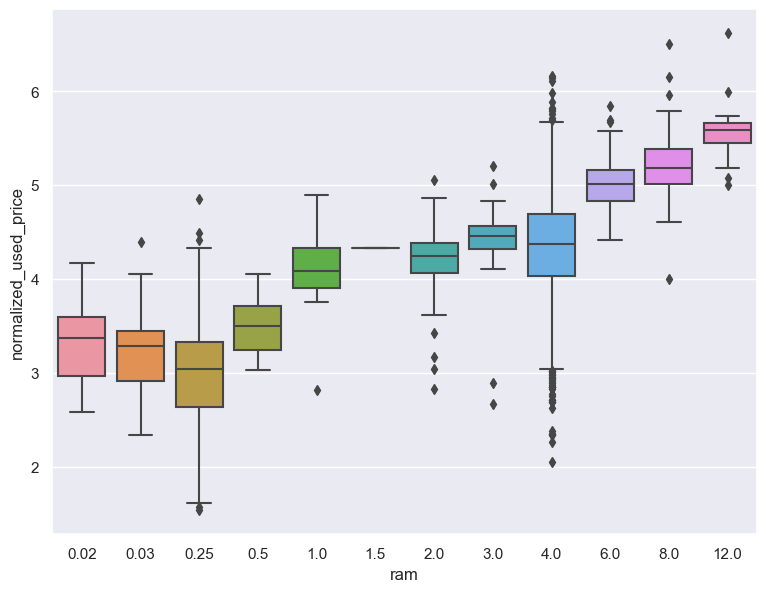

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 4)
sns.boxplot(x="ram", y="normalized_used_price", data=df)

* Devices with higher RAM have higher average normalized used price.

## Data Preprocessing

#### Check for duplicate values

In [46]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

#### Check for null values

In [47]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in 6 columns.
* We will impute missing values by column medians grouped by release_year and brand_name.

#### Missing value treatment

In [48]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]  ## list of columns for missing value treatment

for col in cols_impute:
    df[col] = df[col].fillna(
        value=df.groupby(["release_year", "brand_name"])[col].transform("median")
    )  ## missing values imputed with median grouped by release year and brand name

df.isnull().sum()  # check for missing values

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

* We will impute remaining missing values (main_camera_mp,selfie_camera_mp,battery,weight) by column medians grouped by brand_name.

In [49]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]  ## list of columns for missing value treatment

for col in cols_impute:
    df[col] = df[col].fillna(
        value=df.groupby(["brand_name"])[col].transform("median")
    )  ##  missing values imputed with median grouped by brand name

df.isnull().sum()  # check for missing values

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

* We will fill remaining missing values in main_camera_mp column by column median.

In [50]:
df["main_camera_mp"] = df["main_camera_mp"].fillna(
    df["main_camera_mp"].median()
)  ## impute missing data with median

df.isnull().sum()  ## check for missing values

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

* All missing values have been treated.

## Exploratory Data Analysis

- It is a good idea to explore data once again after manipulating it.

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.617597,4.749438,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3454.0,6.555067,6.968440,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3454.0,54.528474,84.934991,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3454.0,4.032620,1.368598,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3454.0,3132.577446,1298.884193,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3454.0,182.636856,88.360445,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


<IPython.core.display.Javascript object>

In [52]:
df["screen_size"].unique()

array([14.5 , 17.3 , 16.69, 25.5 , 15.32, 16.23, 13.84, 15.77, 15.47,
       15.9 , 16.74, 25.43, 20.32, 15.29, 12.88, 15.24, 15.37, 16.71,
       25.6 , 15.34, 16.59, 16.81, 20.42, 10.16, 17.78, 17.32, 15.39,
       12.7 , 15.44,  5.28, 15.27, 15.8 , 15.72, 12.83,  7.62,  7.75,
       10.03, 15.42, 16.56,  5.18, 16.64, 16.94, 16.33, 10.29, 16.43,
       12.93, 16.36, 16.66, 16.21, 17.5 , 16.13, 16.28, 14.4 , 15.21,
       20.12, 16.89, 16.48, 16.31, 25.53, 12.73, 20.55, 30.71, 27.94,
       25.45, 18.01, 14.35, 16.15, 23.04, 10.34, 10.24, 12.78, 12.75,
       23.01, 11.81, 11.84, 10.36, 11.76, 12.9 , 17.4 , 14.55, 12.8 ,
        7.65, 10.21,  5.08,  5.13,  5.23, 20.35, 12.57, 18.08, 17.65,
       14.83, 15.06, 13.08, 15.14, 30.56, 19.96, 19.94, 25.4 , 11.89,
       15.62, 17.83,  7.85,  7.67, 16.08, 17.73, 12.52, 20.4 ,  7.82,
       15.11, 13.87, 13.61,  5.16, 10.08, 25.55, 15.7 , 14.88, 15.95,
       15.82,  7.7 , 14.53, 17.86, 12.85, 13.34, 11.48,  7.98, 30.53,
        7.8 , 12.12,

<IPython.core.display.Javascript object>

In [53]:
df["main_camera_mp"].unique()

array([13.  ,  8.  ,  5.  , 10.5 ,  3.15,  2.  , 16.  ,  0.3 , 12.  ,
       14.5 , 48.  ,  3.  , 21.  ,  1.3 , 13.1 , 24.  ,  0.08, 20.7 ,
       23.  ,  1.  , 18.  , 12.2 , 12.3 , 20.  , 20.2 ,  4.  , 12.5 ,
       10.  ,  6.5 ,  6.7 , 41.  , 20.1 , 12.6 , 16.3 , 22.6 , 19.  ,
       21.5 , 21.2 ,  8.1 ,  1.2 , 22.5 ])

<IPython.core.display.Javascript object>

In [54]:
df["selfie_camera_mp"].unique()

array([ 5.  , 16.  ,  8.  , 32.  ,  2.  ,  0.3 , 13.  , 14.5 , 24.  ,
       10.  ,  1.3 , 20.  , 25.  ,  0.  , 12.  ,  7.  ,  1.2 ,  3.  ,
        2.1 ,  1.  ,  4.  ,  1.1 , 10.5 ,  1.6 ,  1.8 ,  3.5 ,  0.9 ,
        1.25, 18.  ,  1.9 ,  9.  ,  3.7 , 16.3 ,  5.1 ,  2.2 , 14.  ,
        0.65])

<IPython.core.display.Javascript object>

In [55]:
df["int_memory"].unique()

array([6.400e+01, 1.280e+02, 3.200e+01, 1.600e+01, 2.560e+02, 5.120e+02,
       8.000e+00, 4.000e+00, 5.000e-01, 2.000e-01, 1.000e-01, 6.000e-02,
       1.024e+03, 2.400e+01, 1.000e-02])

<IPython.core.display.Javascript object>

In [56]:
df["os"].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

<IPython.core.display.Javascript object>

In [57]:
df["ram"].unique()

array([ 3.  ,  8.  ,  6.  ,  4.  ,  2.  ,  1.  , 12.  ,  0.5 ,  0.25,
        0.03,  0.02,  1.5 ])

<IPython.core.display.Javascript object>

In [58]:
df["weight"].unique()

array([146.  , 213.  , 480.  , 185.  , 176.  , 144.  , 164.  , 165.  ,
       150.  , 206.  , 171.5 , 172.  , 173.  , 453.6 , 170.  , 160.  ,
       180.  , 192.  , 182.  , 163.  , 310.  , 189.  , 450.  , 226.  ,
       460.  , 183.  , 178.  , 198.  , 196.  , 163.5 , 498.  , 340.  ,
       320.  , 171.  , 196.8 , 136.1 , 350.  , 209.  , 147.6 , 520.  ,
       580.  , 305.  , 236.  , 159.  , 655.  , 196.5 , 219.  , 127.  ,
       218.  , 148.  , 152.  , 186.  , 194.  , 175.  , 179.  , 140.45,
       199.  , 184.  , 166.  , 146.5 ,  89.  ,  85.  , 210.  , 203.  ,
       200.  ,  90.5 ,  91.3 , 220.  ,  88.2 ,  86.5 , 168.  , 181.  ,
       169.5 , 190.  , 215.  , 135.  , 191.  , 195.  , 313.  , 141.  ,
       206.5 , 153.  , 234.  , 204.1 , 181.5 , 190.2 , 197.  , 198.1 ,
       219.5 , 198.5 , 193.  , 186.7 , 191.5 , 190.5 , 218.5 , 217.3 ,
       217.  , 189.5 , 130.  , 145.  , 208.  , 205.  , 188.  , 241.  ,
       173.8 , 157.  , 154.  , 187.  , 467.  , 168.1 , 420.  , 256.  ,
      

<IPython.core.display.Javascript object>

In [59]:
df["days_used"].unique()

array([ 127,  325,  162,  345,  293,  223,  234,  219,  161,  327,  268,
        344,  537,  336,  230,  248,  395,  421,  532,  266,  321,  933,
        187,  499,  497,  202,  493,   91,  299,  354,  306,  231,  205,
        211,  120,  139,   93,  460,  256,  206,  488,  516,  289,  477,
        195,  244,  376,  406,  462,  333,  284,  445,  375,  666,  819,
        245,  173,  316,  468,  356,  233,  419,  267,  461,  423,  528,
        254,  370,  482,  691,  273,  349,  343,  352,  142,   92,  166,
        329,  383,  443,  257,  380,  255,  512,  200,  210,  216,  724,
        628,  750,  186,  449,  190,  459,  517,  332, 1016,  956,  680,
        733, 1029,  242,  220,  310,  193,  272,  288,  110,  208,  458,
        294,  271,  100,  146,  397,  411,  276,  392,  296,  664, 1076,
        317,  338,  111,  167,  399,  909,  135,  523,  414,  153,  125,
        123,  413,  246,  145,  300,  118,  312,  226,  199,  279,  212,
        188,  264,  259,  500,  391,  204,  456,  2

<IPython.core.display.Javascript object>

In [60]:
df["battery"].unique()

array([3020. , 4300. , 4200. , 7250. , 5000. , 4000. , 3400. , 4100. ,
       3750. , 5100. , 5680. , 3850. , 3075. , 3300. , 3930. , 4500. ,
       7500. , 6100. , 3500. , 1700. , 6000. , 3200. , 3000. , 7000. ,
       3590. , 4050. , 8400. , 1470. , 3450. , 8200. , 1540. , 3600. ,
       1500. , 2000. , 1020. , 1200. , 4085. , 4230. , 4025. , 4035. ,
       4020. , 4065. , 3130. , 3090. , 3820. , 2700. , 4315. , 4350. ,
       4030. , 3700. , 3260. , 3940. , 1900. , 2920. , 4520. , 4800. ,
       5020. , 2600. , 7040. , 7600. , 2800. , 9720. , 5770.5, 8827. ,
       7812. , 5124. , 3230. , 2200. , 1760. , 3100. , 3240. , 2840. ,
       1800. , 2460. , 4080. , 4420. , 2870. , 2420. , 5910. , 4550. ,
       2300. , 1300. , 2100. , 2500. , 4600. , 1630. , 2955. , 2400. ,
       7300. , 4960. , 2640. , 2710. , 2580. , 2850. , 2050. , 2150. ,
       2960. , 2610. , 2910. , 2820. , 1400. , 1000. , 4060. ,  750. ,
        850. , 3050. , 3150. , 2350. , 3140. , 1850. , 1350. , 1920. ,
      

<IPython.core.display.Javascript object>

In [61]:
df["normalized_used_price"].unique()

array([4.30757245, 5.16209665, 5.11108377, ..., 5.03773152, 4.35734965,
       4.34976167])

<IPython.core.display.Javascript object>

* Data pre-processing has not impacted values in columns. No improper or questionable values found.

#### Recheck correlation

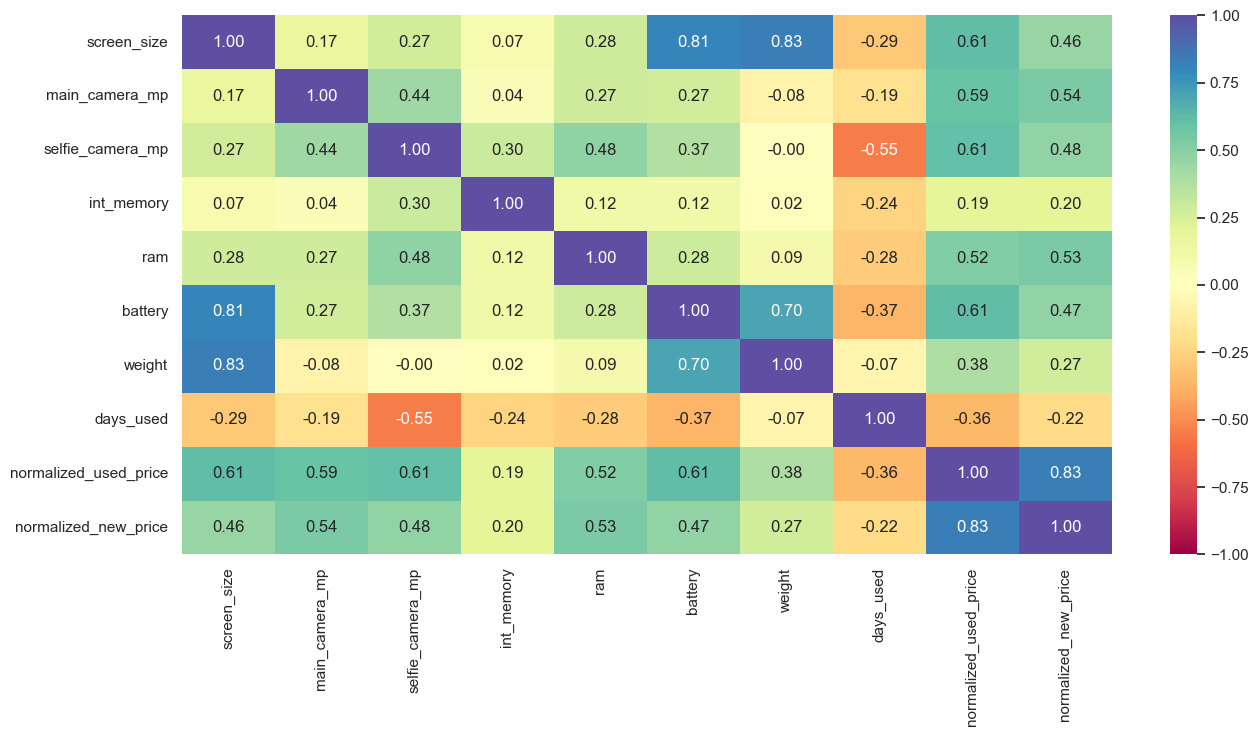

<IPython.core.display.Javascript object>

In [62]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [63]:
corr_df = df.corr()  # coefficients of correlation between columns
corr_df

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.166747,0.271639,0.072158,0.278085,0.811678,0.828856,0.364223,-0.291723,0.614785,0.460889
main_camera_mp,0.166747,1.000000,0.436236,0.041150,0.274184,0.269177,-0.082511,0.377299,-0.185971,0.590853,0.537730
selfie_camera_mp,0.271639,0.436236,1.000000,0.296735,0.478071,0.370010,-0.004314,0.690883,-0.552605,0.607826,0.475019
int_memory,0.072158,0.041150,0.296735,1.000000,0.124638,0.118686,0.015846,0.235329,-0.242464,0.191417,0.196481
ram,0.278085,0.274184,0.478071,0.124638,1.000000,0.283241,0.092129,0.312432,-0.279892,0.522324,0.533808
battery,0.811678,0.269177,0.370010,0.118686,0.283241,1.000000,0.699653,0.488427,-0.370949,0.612995,0.470722
weight,0.828856,-0.082511,-0.004314,0.015846,0.092129,0.699653,1.000000,0.071795,-0.068229,0.382828,0.270269
release_year,0.364223,0.377299,0.690883,0.235329,0.312432,0.488427,0.071795,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.185971,-0.552605,-0.242464,-0.279892,-0.370949,-0.068229,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.590853,0.607826,0.191417,0.522324,0.612995,0.382828,0.509790,-0.358264,1.000000,0.834496


<IPython.core.display.Javascript object>

* Data pre-processing has not impacted correlation between columns. No further exploration needed at this point.

#### Feature Engineering

* Let's create a new column years_since_release from the release_year column.
* We will consider the year of data collection, 2021, as the baseline.
* We will drop the release_year column.

In [64]:
df1 = df.copy()

<IPython.core.display.Javascript object>

In [65]:
df1.shape

(3454, 15)

<IPython.core.display.Javascript object>

In [66]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.617597,4.749438,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.577446,1298.884193,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

In [67]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

<IPython.core.display.Javascript object>

#### Outlier Detection

* Checking for outliers in data

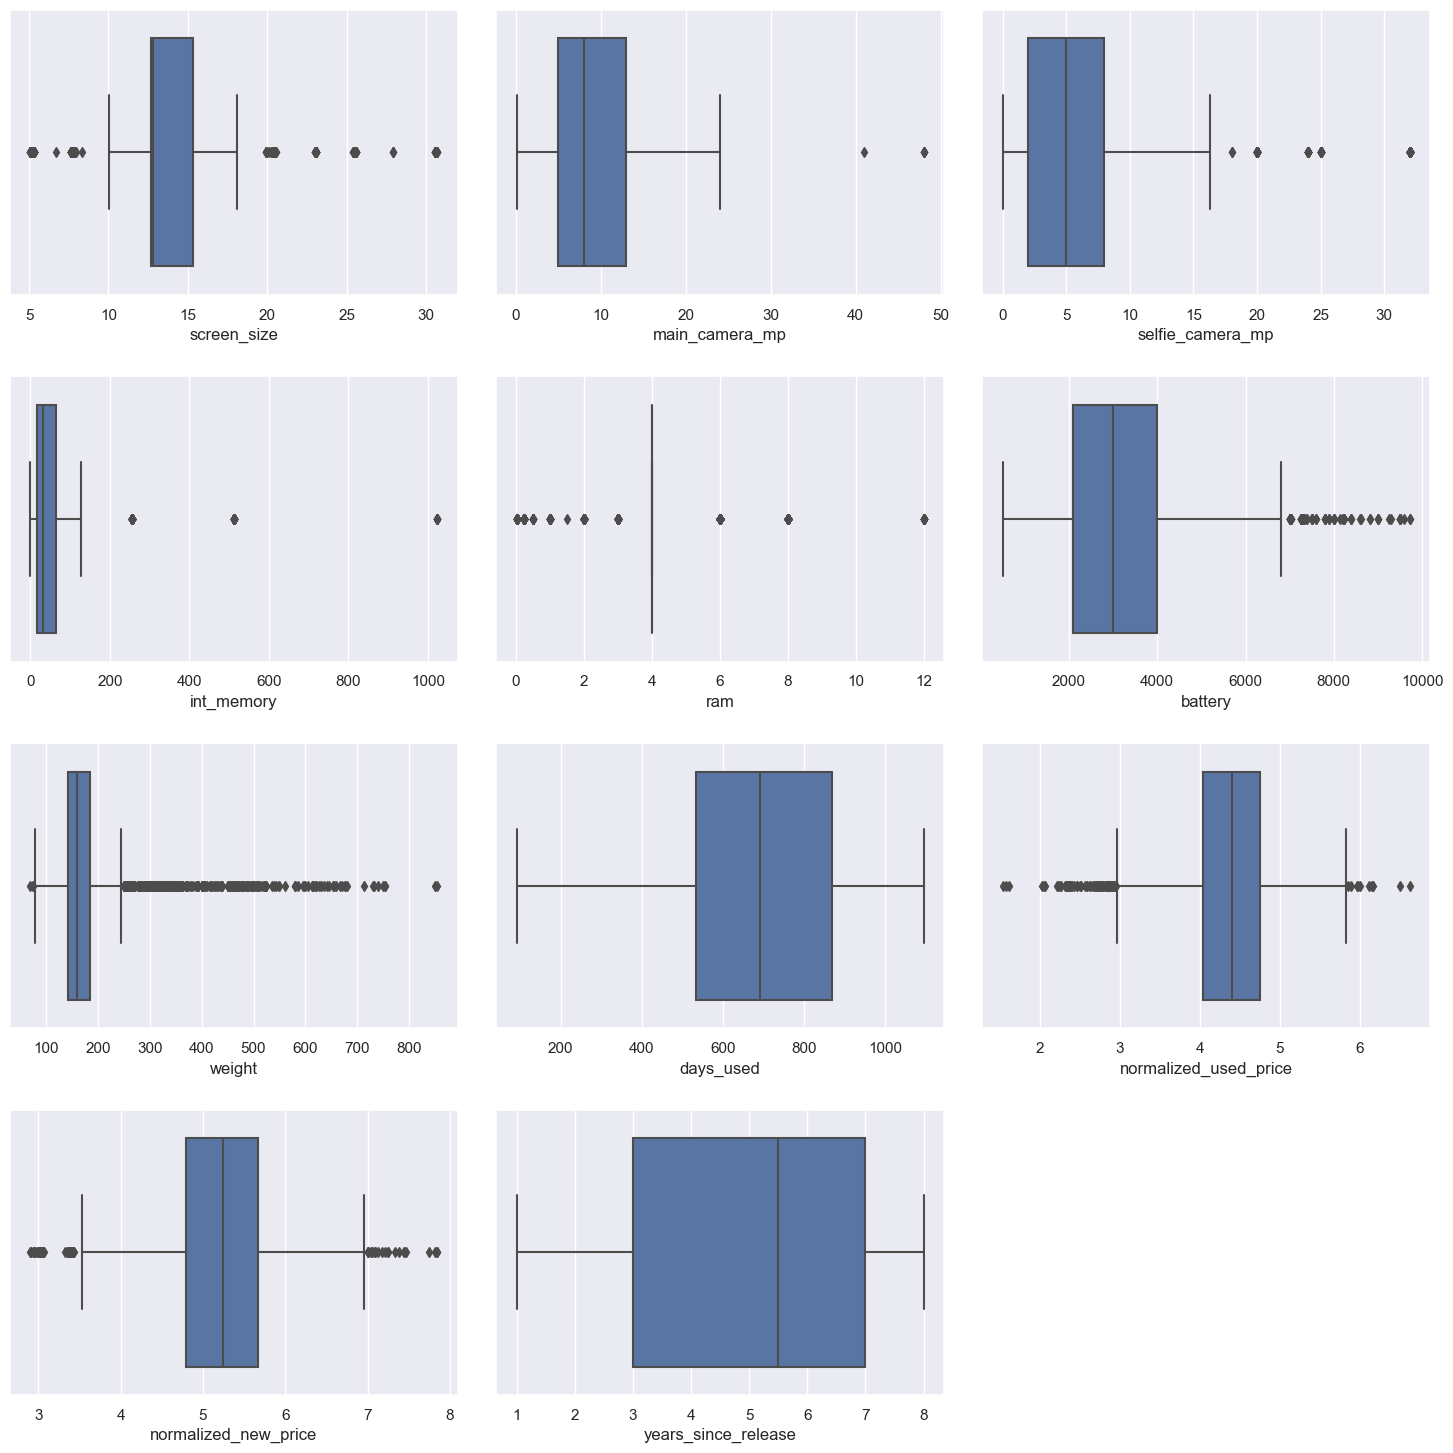

<IPython.core.display.Javascript object>

In [68]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* There are outliers found in screen size, selfie camera mp, internal memory, ram, battery, weight, normalized used price and normalized new price colums. 
* Internal memory has some low numbers, it is possible for devices to have very small memory.
* RAM has some small numbers but mostly 4GB.
* Based on unique values for other columns run above, though outliers are present they seem to be mostly legitimate values.

#### Data preparation for modeling

In [69]:
## define dependent and independent variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

<IPython.core.display.Javascript object>

In [70]:
# add intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [71]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [72]:
# splitting data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [73]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

In [74]:
print("Number of rows in train data =", y_train.shape[0])
print("Number of rows in test data =", y_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Model Building - Linear Regression

In [75]:
# first OLS model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                           08:56:36   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

### Interpretation of R-squared

* R-squared value tells us that the model can explain 84.5% of variance in training set.
* Adjusted R-squared value (0.842) reflects fit of the model, generally ranges from 0 to 1, higher value usually indicates a better fit, assuming certain conditions are met. 


### Interpretation of Coefficients

* Coefficients tell us how one unit change in X can affect Y
* Sign of coefficient indicates if relationship between X and Y is positive or negative
* An unit increase in screen_size will increase normalized used price by 0.0244
* An unit increase in years_since_release will decrease normalized used price by 0.0237

## Model Performance Check


* Let's check model performance using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and R2

* We will define a function to calculate MAPE and adjusted R2

* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the     average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there     are no extreme values in the data and none of the actual values are 0.

In [76]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [77]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


<IPython.core.display.Javascript object>

In [78]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


<IPython.core.display.Javascript object>

#### Observations

* Training R2 is 0.84, so model is not underfitting
* Train and Test RMSE and MAE are comparable, so model is not overfitting either
* MAE suggests that model can predict normalized_used_price within a mean error of 0.18 on test data
* MAPE of 4.5 on test data means we are able to predict within 4.5% of normalized_used_price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure linear regression assumptions are satisfied.

Linear Regression assumptions:

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

TEST FOR MULTICOLLINEARITY

We will test for multicollinearity using VIF.

General Rule of thumb:

* If VIF is 1 then there is no correlation between the kth predictor and the remaining predictor variables.
* If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
* If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.
* Let's define a function to check VIF.

In [79]:
# function to check VIF


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [80]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


<IPython.core.display.Javascript object>

* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore VIF values for dummy variables and the constant (intercept)

#### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5
2. Look at the adjusted R-squared and RMSE of all these models
3. Drop the variable that makes the least change in adjusted R-squared
4. Check the VIF scores again
5. Continue till you get all VIF scores under 5

Let's define a function to do this.

In [81]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [82]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


<IPython.core.display.Javascript object>

In [83]:
col_to_drop = (
    "screen_size"  ## column to drop, this makes least change to adjusted R squared
)
x_train2 = x_train.loc[
    :, ~x_train.columns.str.startswith(col_to_drop)
]  ## drop screen_size from train data


x_test2 = x_test.loc[
    :, ~x_test.columns.str.startswith(col_to_drop)
]  ## drop screen_size from test data

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


<IPython.core.display.Javascript object>

* None of the variables show moderate or high multicollinearity
* We have dealt with multicollinearity in data by dropping screen_size, which made least change to adjusted R-squared.
* Let's rebuild model using updated set of predictor variables

In [84]:
olsmod1 = sm.OLS(
    y_train, x_train2
).fit()  ## model after removing multicollinearity (dropping screensize)
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                           08:57:32   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

#### Observations

* R squared remains the same at 0.842. Adjusted R2 is 0.838.
* As there is no multicollinearity, we can look at p-values of predictor variables to check their significance

### Dealing with high p-value variables

* Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
* But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
* Instead, we will do the following:
    -Build a model, check p-values of variables, and drop column with highest p-value
    -Create a new model without the dropped feature, check p-values of variables, and drop column with highest p-value
    -Repeat above two steps till there are no columns with p-value > 0.05

In [85]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [86]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [87]:
olsmodel2 = sm.OLS(y_train, x_train3).fit() ## OLS()on updated dataset with no multicollinearity and no insignificant predictors
print(olsmodel2.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                           08:58:13   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [88]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(
    olsmodel2, x_train3, y_train
)  ## check performance on train data
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


<IPython.core.display.Javascript object>

In [89]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(
    olsmodel2, x_test3, y_test
)  ## check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


<IPython.core.display.Javascript object>

#### Observations

* Training R2 is 0.83, so the model is not underfitting

* Train and Test RMSE and MAE are comparable, so the model is not overfitting either

* MAE suggests that the model can predict normalized_used_price within a mean error of 0.18 on the test data

* MAPE of 4.5 on test data means that we are able to predict within 4.5% of normalized_used_price

### Now we'll check rest of assumptions on olsmodel2.

     1. Linearity of variables

     2. Independence of error terms

     3. Normality of error terms

     4. No Heteroscedasticity

#### TEST FOR LINEARITY AND INDEPENDENCE

* We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
* If there is no pattern, model is linear and residuals are independent.
* Otherwise, model is showing signs of non-linearity and residuals are not independent.

In [90]:
# create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


<IPython.core.display.Javascript object>

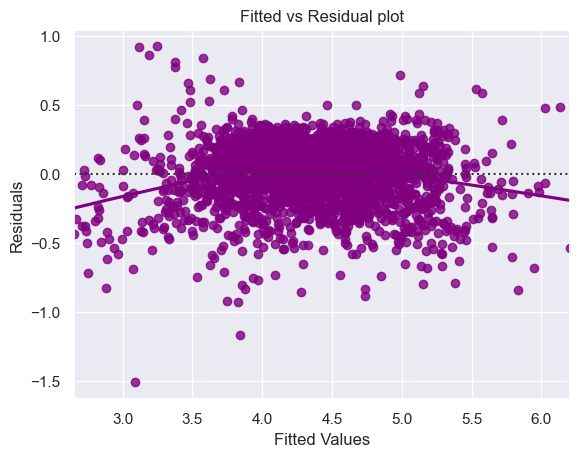

<IPython.core.display.Javascript object>

In [91]:
# plot fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* There is no pattern observed between fitted and residual values.
* Model is linear and residuals are independent.

#### TEST FOR NORMALITY

* We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
* If residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* If p-value of Shapiro-Wilk test is greater than 0.05, residuals are normally distributed.

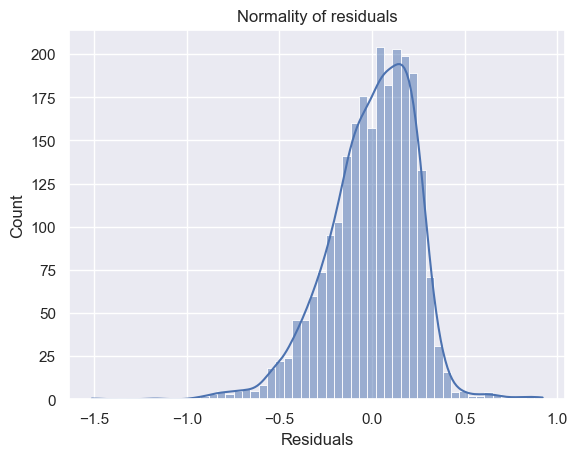

<IPython.core.display.Javascript object>

In [92]:
sns.histplot(data=df_pred, x="Residuals", kde=True)  ## distribution of residuals
plt.title("Normality of residuals")
plt.show()

* Residuals are normally distributed

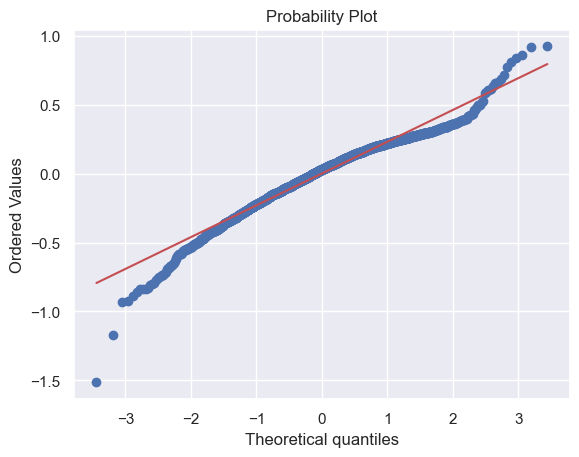

<IPython.core.display.Javascript object>

In [93]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)  ## check Q-Q plot
plt.show()

* Most of the points are lying on a straight line in QQ plot

#### Shapiro-Wilk test can also be used for checking normality. Null and alternate hypotheses:

* Null hypothesis - Data is normally distributed.
* Alternate hypothesis - Data is not normally distributed.

In [94]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

<IPython.core.display.Javascript object>

* Since p-value < 0.05, residuals are not normally distributed as per shapiro test.
* Strictly speaking - residuals are not normally distributed. However, as an approximation, we accept this distribution as close to being normal

### TEST FOR HOMOSCEDASTICITY

* We will test homoscedasticity by using Goldfeldquandt test.
* If p-value is greater than 0.05, residuals are homoscedastic. Otherwise, they are heteroscedastic.

Null and alternate hypotheses of Goldfeldquandt test:

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

In [95]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)  ## Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.0087504199106763), ('p-value', 0.4401970650667071)]

<IPython.core.display.Javascript object>

* Since p-value > 0.05, residuals are homoscedastic.

### All linear regression assumptions are now satisfied. Let's get predictions on test data.

In [96]:
# predictions on test set
pred = olsmodel2.predict(x_test3)
df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


<IPython.core.display.Javascript object>

* Model has returned pretty good prediction results, actual and predicted values are comparable.Lets recreate final model.

## Final Model

In [97]:
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                           08:58:48   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

### Observations

* R-squared is 0.839 and adjusted R-squared is 0.838, which shows that model is able to explain ~83% variance in data. This is quite good.


In [98]:
olsmodel2.params  # model parameters

const                   1.499981
main_camera_mp          0.020967
selfie_camera_mp        0.013827
ram                     0.020713
weight                  0.001662
normalized_new_price    0.441472
years_since_release    -0.029170
brand_name_Karbonn      0.115598
brand_name_Samsung     -0.037423
brand_name_Sony        -0.066993
brand_name_Xiaomi       0.080068
os_Others              -0.127575
os_iOS                 -0.090006
4g_yes                  0.050213
5g_yes                 -0.067259
dtype: float64

<IPython.core.display.Javascript object>

In [99]:
# Linear regression equation

Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(x_train3.columns)):
    if i == 0:
        print(olsmodel2.params[i], "+", end=" ")
    elif i != len(x_train3.columns) - 1:
        print(
            olsmodel2.params[i],
            "* (",
            x_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel2.params[i], "* (", x_train3.columns[i], ")")

normalized_used_price = 1.4999812451972607 + 0.02096722879075308 * ( main_camera_mp ) +  0.013827288876828627 * ( selfie_camera_mp ) +  0.02071270165714755 * ( ram ) +  0.0016616476692228026 * ( weight ) +  0.44147230022363804 * ( normalized_new_price ) +  -0.029169763671538975 * ( years_since_release ) +  0.11559844506476341 * ( brand_name_Karbonn ) +  -0.037423299340729105 * ( brand_name_Samsung ) +  -0.06699285130111737 * ( brand_name_Sony ) +  0.08006840695804282 * ( brand_name_Xiaomi ) +  -0.12757512561897785 * ( os_Others ) +  -0.09000552317648867 * ( os_iOS ) +  0.05021345152978311 * ( 4g_yes ) +  -0.06725868426972254 * ( 5g_yes )


<IPython.core.display.Javascript object>

In [100]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

<IPython.core.display.Javascript object>

In [101]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                           08:59:01   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [102]:
# model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


<IPython.core.display.Javascript object>

In [103]:
# model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


<IPython.core.display.Javascript object>

### Conclusion

* Model is able to explain ~83% of variation in data, model is not underfitting
* Train and test RMSE and MAE are low and comparable, model is not overfitting
* MAPE on test set suggests model can predict within 4.5% of normalized_used_price
* Model (olsmodel_final) is good for prediction as well as inference purposes

* Normalized used price and normalized new price attributes are linear, as normalized new price increases, normalized used price increases.

* An unit increase in main camera mp (main_camera_mp) will result in increase in normalized_used_price by 0.021, all other variables remaining constant.

* An unit increase in selfie camera mp (selfie_camera_mp) will result in increase in normalized_used_price by 0.0138, all other variables remaining constant.

* An unit increase in RAM (ram) will result in increase in normalized_used_price by 0.0207, all other variables remaining constant

* An unit increase in device weight (weight) will result in increase in normalized_used_price by 0.0017, all other variables remaining constant.

* An unit increase in normalized new price (normalized_new_price) will result in increase in normalized_used_price by 0.4415, all other variables remaining constant.

* An unit increase in years_since_release will result in decrease in normalized_used_price by 0.0292, all other variables remaining constant.

* An increase in 5g enabled devices will result in decrease in normalized_used_price by 0.0673, all other variables remaining constant.

## Actionable Insights and Recommendations 

* From linear regression equation, normalized used price is positively impacted by these following attributes - normalized new price, main camera resolution, selfie camera resolution, amount of RAM, device weight, 4g network availability, Karbonn, Xiaomi brands. Higher the new price, camera resolution (front and selfie), RAM, device weight, 4g, Karbonn,Xiaomi brands - higher the normalized used price.

* From linear regression equation, normalized used price is negatively impacted by these following attributes - years since release of device, operating system ("others", "ios"), device brands Samsung, Sony, 5G network availability. Higher the age of device, operating system belonging to others/ios, device brands belonging to Samsung/Sony, 5G capability, lower the normalized used price.

* Data was collected in 2021, during covid where consumer buyer sentiment was generally low. ReCell can analyze data from 2022 to analyze year over year sales trend and pattern across both 2021 and 2022.

* ReCell can collect user demographics like age, gender, geographic location to analyze device sales in addition to used price.

* On average, devices are used for about 675 days. Years since release (age of device) negatively impacts used price. In addition to offering new brands,ReCell can offer incentives on older model devices to drive up sales.

* Normalized_used_price increases with higher front and selfie camera resolution (main_camera_mp, selfie_camera_mp). Huawei, Vivo, Oppo , Xiaomi, Samsung are the top 5 brands with devices greater than 8mp selfie camera. Sony, Motorola, Others, HTC are the top brands offering main camera resolution greater than 16mp. ReCell can focus on selling more devices across these brands to drive sales.

* Devices with higher RAM have higher average normalized used price. OnePlus,Oppo,Honor,Realme, Google seem to have close to or higher than mean RAM configuration. Infinix,Nokia,Celkon are brands that offer low RAM devices. ReCell has to sell more devices across brands offering 4gb or higher RAM configurations.

* 4g configuration positively impacts normalized used price and 5g negatively impacts used price, but this was 2021 data. Based on this data, ReCell can sell more 4g enabled phones and offer special deals for 5g to boost sales. Currently, 5g trend has taken precedence, so ReCell needs to reanalyze this trend with 2022 data. 4g/5g phones typically have more mp , which positively impacts used price.

* Device weight positively impacts normalized used price. Google,Lenovo,Apple,Sony,HTC,Samsung, Huawei, Others, Alcatel, LG are the top brands offering devices greater than 4500mAh. ReCell can continue to sell more devices across these brands.

* OS (others and IOS) negatively impact normalized used price. Android is the most popular os. Devices with IOS and 'others' reduce used price. ReCell must sell more Android devices and offer incentives for other categories to up sales.

* Device brands Karbonn and Xiaomi positively impact normalized used price, ReCell must sell more devices across these brands. Samsung and Sony brands show negative impact on normalized used price. ReCell can run marketing campaigns to boost these brands and analyze which specific models from these brands are causing negative impact. 
